## Business Case: Aerofit - Descriptive Statistics & Probability

### Problem Statement
Identify the Target Audience for the each type of Threadmill

#### Analysing Basic Metrics

In [ ]:
import datetime
start_time = datetime.datetime.now()  # Setup a timestamp for the start of the script

In [ ]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import binom, norm, poisson

In [ ]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Retrieving the Aerofit dataset
# aerofit_df = pd.read_csv("aerofit_treadmill.csv")
aerofit_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
aerofit_df.sample(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
126,KP481,34,Male,16,Partnered,3,4,59124,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
aerofit_df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
rows, columns = aerofit_df.shape
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 180 rows and 9 columns


In [ ]:
# Quick Overview of the dataset
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<span style="font-size: 14px;">
<strong> Inference: </strong> From the above analysis, we found that majoroty of the columns are integer datatype except Product, Gender and MaritalStatus.
</span>

In [ ]:
# Finding the Number of Null Values
aerofit_df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


<span style="font-size: 14px;">
<strong> Inference: </strong> From the above analysis, we found that there is no null values in the dataset
</span>

In [ ]:
aerofit_df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


<span style="font-size: 14px;">
<strong> Inference: </strong>
<br>
From the above analysis, we found that majoroty of the columns are integer datatype except Product, Gender and MaritalStatus.
<ul>
    <li>There are three Unique Products</li>
    <li>There are two Gender Categories</li>
    <li>There are two Marital Statuses</li>
    <li>There are six different Usage Values. So, can also be considered as category. Will change to String Datatype</li>
    <li>There are five different Fitness Scales. So, this can also follow the same approach as Usage</li>
</ul>
</span>

In [ ]:
# Converting Usage and Fitness column into categorical data type
aerofit_df['Usage'] = aerofit_df['Usage'].astype('str')
aerofit_df['Fitness'] = aerofit_df['Fitness'].astype('str')

aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    object
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.8+ KB


In [ ]:
# Finding duplicat rows
aerofit_df.duplicated().value_counts()

,count
False,180


In [ ]:
# Unique values in each categorical column
for col in aerofit_df.select_dtypes(["object"]).columns:
    print("Unique Values in", col, aerofit_df[col].unique())
    print("-"*100)

Unique Values in Product ['KP281' 'KP481' 'KP781']
----------------------------------------------------------------------------------------------------
Unique Values in Gender ['Male' 'Female']
----------------------------------------------------------------------------------------------------
Unique Values in MaritalStatus ['Single' 'Partnered']
----------------------------------------------------------------------------------------------------
Unique Values in Usage ['3' '2' '4' '5' '6' '7']
----------------------------------------------------------------------------------------------------
Unique Values in Fitness ['4' '3' '2' '1' '5']
----------------------------------------------------------------------------------------------------


In [ ]:
aerofit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


<span style="font-size: 14px;">
<strong> Inference: </strong>
<br>
<ul>
    <li><strong>Age: </strong> For the given dataset, the people's age ranges from 18 to 50 with an average of 28.7 and median of 26 which indicates that the given dataset is slightly right skewed</li>
    <li><strong>Education: </strong>The number of years of education ranges from 12 to 21 years with an average of 15.5 and the median of 16</li>
    <li><strong>Income: </strong>Income of the people ranges from 29.5k to 14.5k dollars with an average of 53.7k and the median of 50.5k</li>
    <li><strong>Miles: </strong>Average Miles ranging from 51.8 to 360 mileswith an average of 103 and the median of 94</li>
</ul>
</span>

In [ ]:
aerofit_df.describe(include='object')

,Product,Gender,MaritalStatus,Usage,Fitness
count,180,180,180,180,180
unique,3,2,2,6,5
top,KP281,Male,Partnered,3,3
freq,80,104,107,69,97


<span style="font-size: 14px;">
<strong> Inference: </strong>
<br>
<ul>
    <li><strong>Product: </strong>There are 3 unique categories in which most of them uses KP281 with the frequency of 80.</li>
    <li><strong>Gender: </strong>Male and Female are the Gender categories available in the dataset and Males had the product more than Female.</li>
    <li><strong>Marital Status: </strong>Single and Partnered are the two categories in which Partnered people uses the most.</li>
    <li><strong>Usage: </strong>Most of the people uses the treadmill 3 times a week.</li>
    <li><strong>Fitness: </strong>Most of the people in scale 3 out of 5 uses the treadmill most.</li>
</ul>
</span>

<span style="font-size: 14px;">
<strong> Inference: </strong> There are no duplicate rows in the given dataset
</span>

#### Data Pre-Processing - Outliers Detection and Processing

##### Income Field

In [ ]:
# Finding Outliers for Income Field
fig = px.box(aerofit_df, x='Income', labels={'x': 'Income', 'y': 'Value'}, title='Boxplot of Income')
fig.show()

In [ ]:
# Getting Q1 and Q3
Q1 = aerofit_df['Income'].quantile(0.25)
Q3 = aerofit_df['Income'].quantile(0.75)
print("Q1:", Q1)
print("Q3:", Q3)

Q1: 44058.75
Q3: 58668.0


In [ ]:
# Calculating IQR
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 14609.25


In [ ]:
# Calculating Lower and Upper Boundry
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 22144.875
Upper Bound: 80581.875


In [ ]:
# Finding % of Outliers
percentOfOutlier = len(aerofit_df[(aerofit_df['Income'] < lower_bound) | (aerofit_df['Income'] > upper_bound)])/len(aerofit_df)*100
print("Percentage of Outliers:", percentOfOutlier)

Percentage of Outliers: 10.555555555555555


<span style="font-size: 14px;">
<strong> Inference: </strong> There are 10% of outliers in income field which we can't drop. Hence, including them to get some useful insights. Moreover, the 10% of the outlier indicates that the people with very high income also using the treadmill.
</span>

##### Miles Field

In [ ]:
# Finding Outliers for Income Field
fig = px.box(aerofit_df, x='Miles', labels={'x': 'Miles', 'y': 'Value'}, title='Boxplot of Miles')
fig.show()

In [ ]:
# Getting Q1 and Q3
Q1 = aerofit_df['Miles'].quantile(0.25)
Q3 = aerofit_df['Miles'].quantile(0.75)
print("Q1:", Q1)
print("Q3:", Q3)

Q1: 66.0
Q3: 114.75


In [ ]:
# Calculating IQR
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 48.75


In [ ]:
# Calculating Lower and Upper Boundry
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -7.125
Upper Bound: 187.875


In [ ]:
# Finding % of Outliers
percentOfOutlier = len(aerofit_df[(aerofit_df['Miles'] < lower_bound) | (aerofit_df['Miles'] > upper_bound)])/len(aerofit_df)*100
print("Percentage of Outliers:", percentOfOutlier)

Percentage of Outliers: 7.222222222222221


<span style="font-size: 14px;">
<strong> Inference: </strong> There are 7.2% of outliers in Miles field which we can't drop. Hence, including them to get some useful insights. Moreover, the outliers indicates that some people are intensively using treadmills.
</span>

In [ ]:
# converting Age, Education and Miles into Categorical Columns by creating bins
aerofit_df['Age_Group'] = pd.cut(aerofit_df['Age'], bins=[18, 24, 34, 44, 50], labels=['Young', 'Adult', 'Middle Aged', 'Old']).astype('object')
aerofit_df['Education_Group'] = pd.cut(aerofit_df['Education'], bins=[12, 14, 17, 21], labels=['Secondary', "Under Graduate", "Post Graduate"]).astype('object')
aerofit_df['Miles_Group'] = pd.cut(aerofit_df['Miles'], bins=[21, 60, 120, 240, 360], labels=['Light', "Regular", "Heavy", "Intensive"]).astype('object')
aerofit_df['Income_Group'] = pd.cut(aerofit_df['Income'], bins=[29000, 50000, 75000, 105000], labels=['Low', "Medium", "High"]).astype('object')

aerofit_df.sample(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Education_Group,Miles_Group,Income_Group
138,KP481,45,Male,16,Partnered,2,2,54576,42,Old,Under Graduate,Light,Medium
33,KP281,25,Male,16,Single,3,3,43206,85,Adult,Under Graduate,Regular,Low


#### Univariate Analysis

##### Categorical Columns

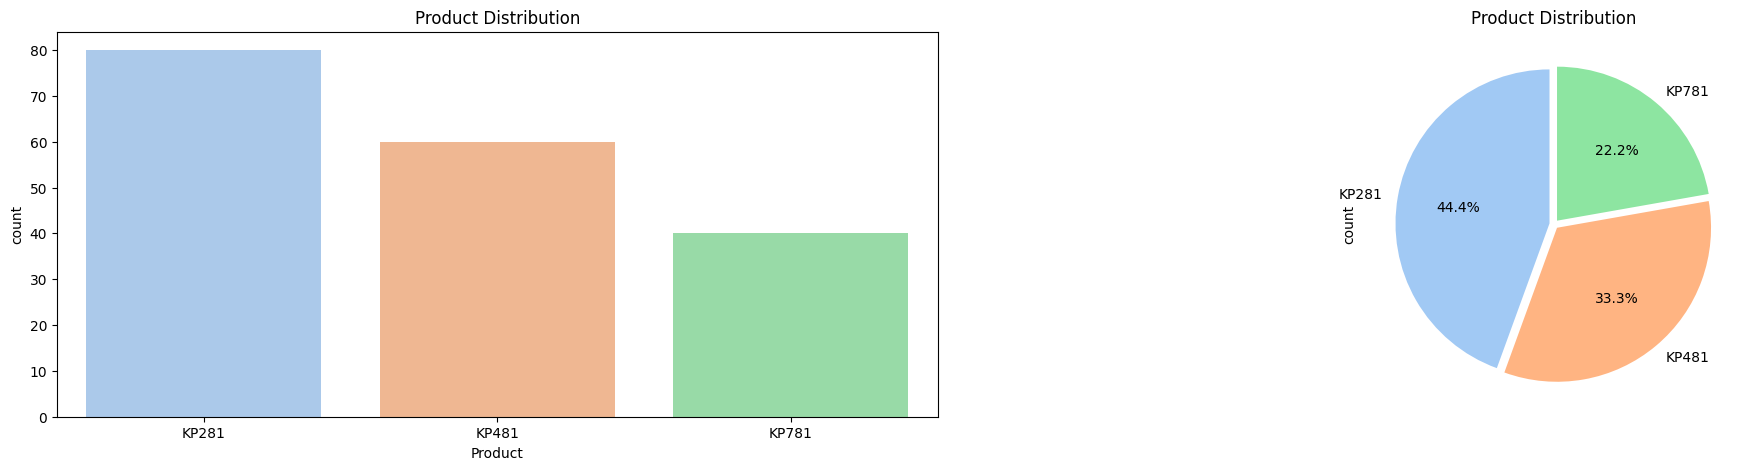

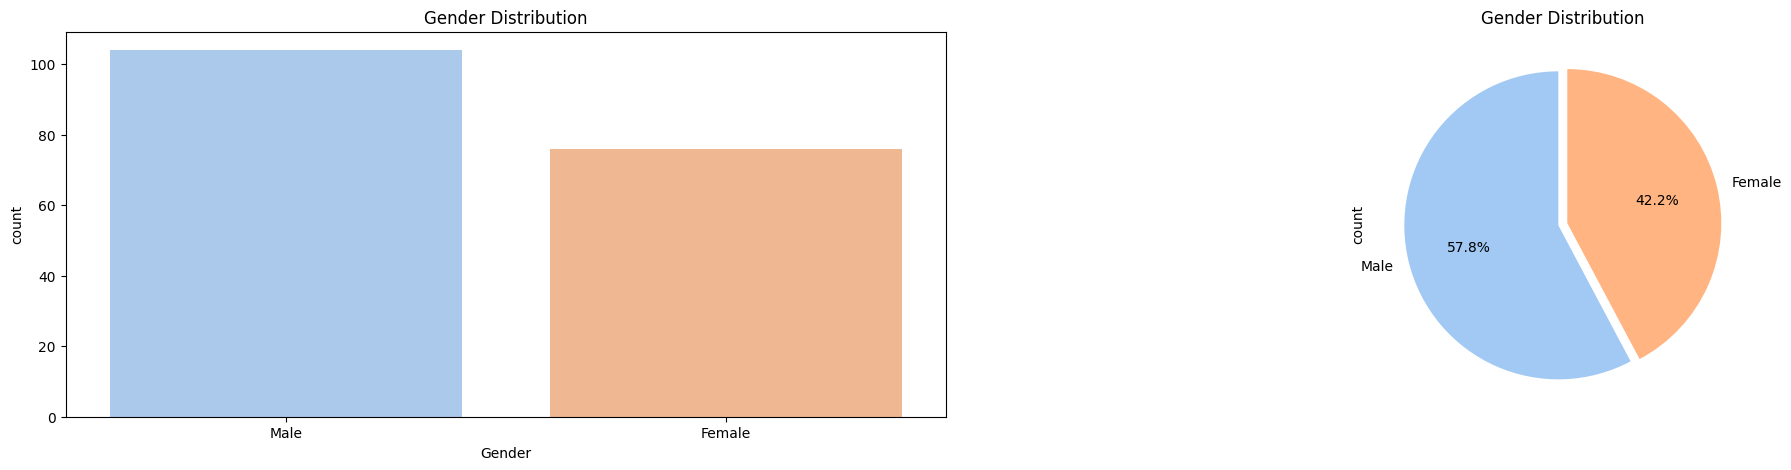

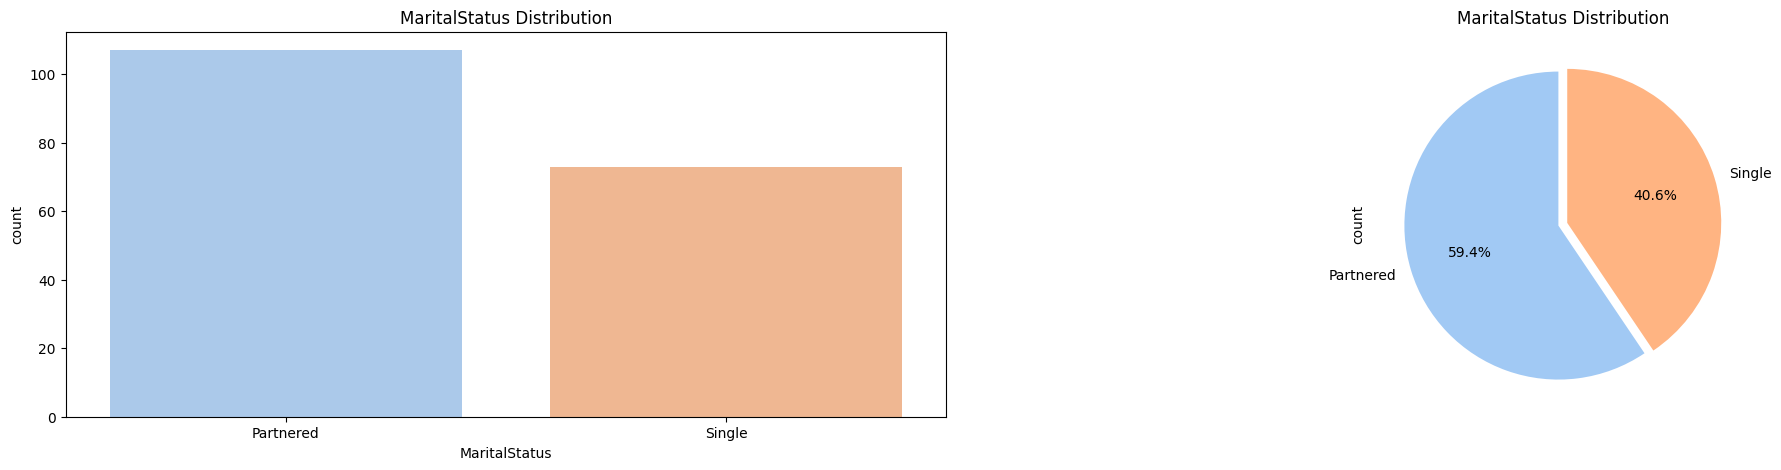

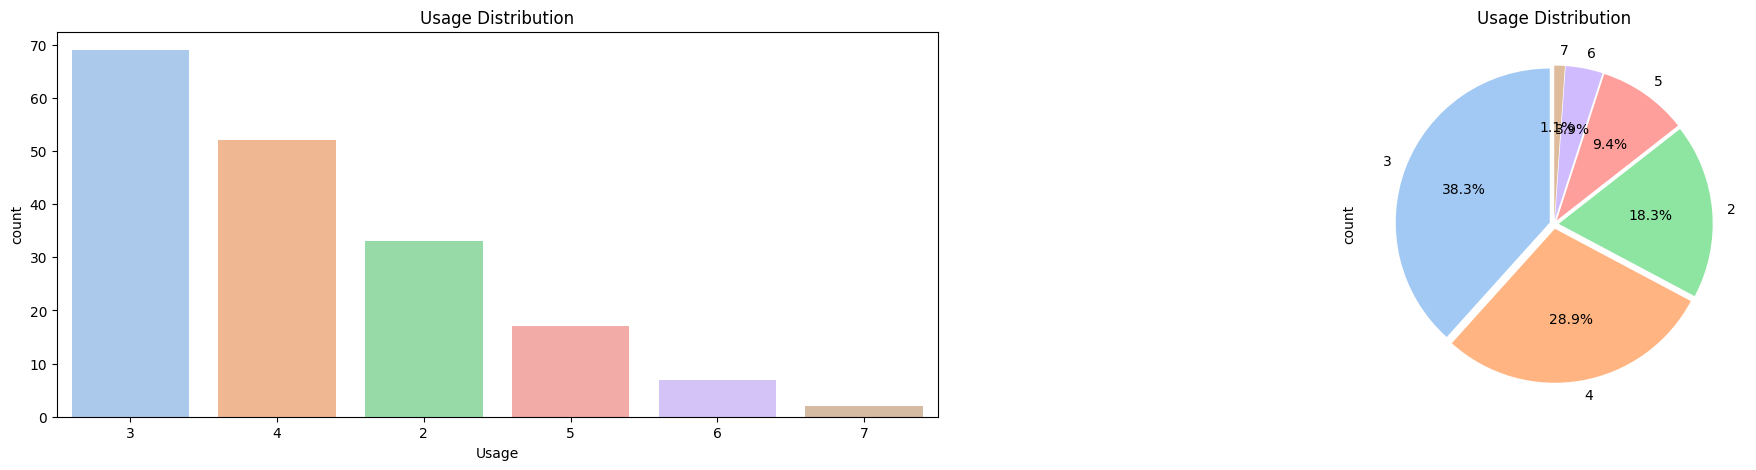

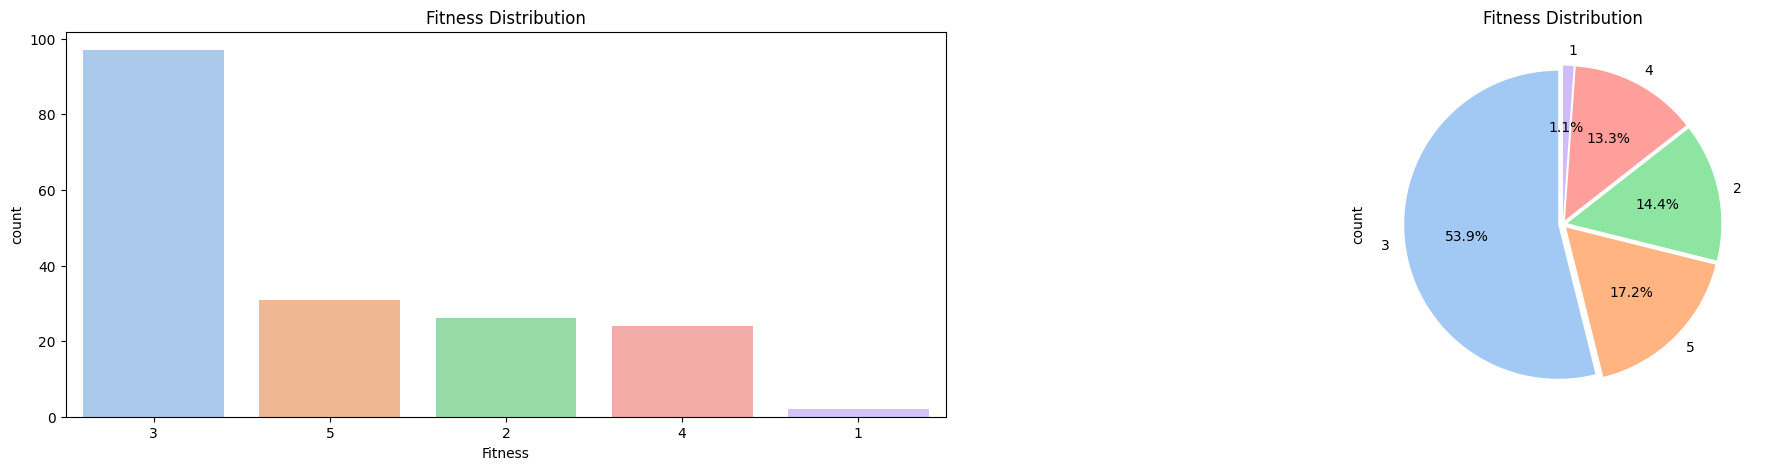

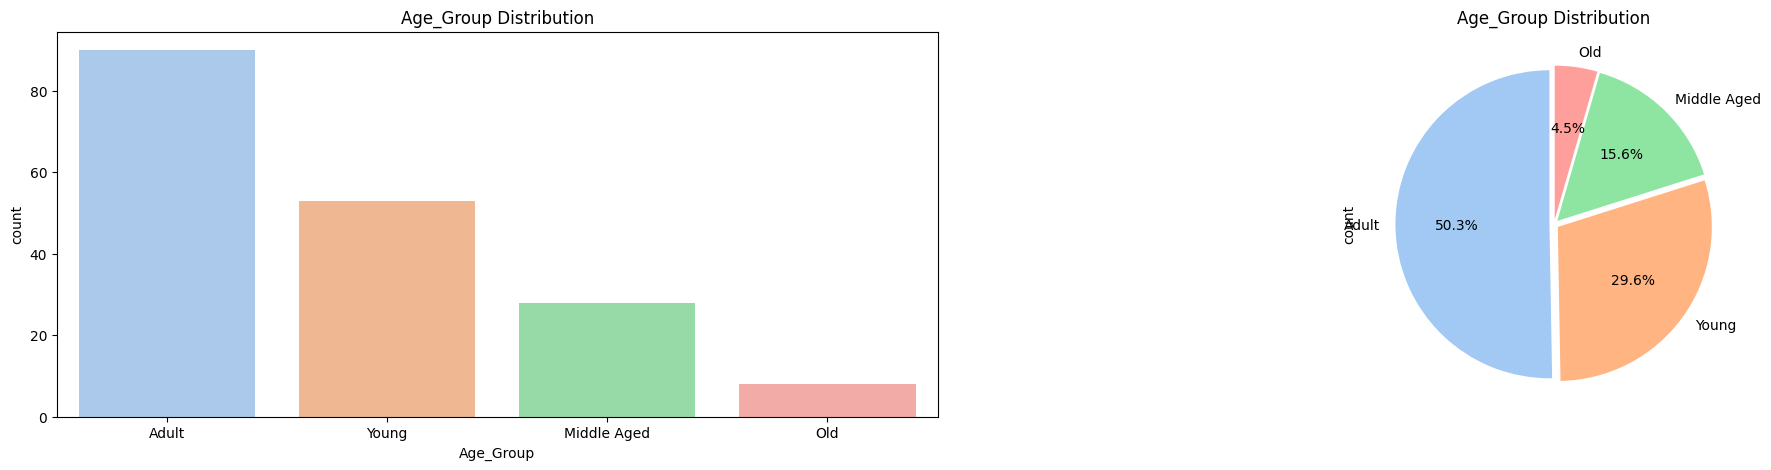

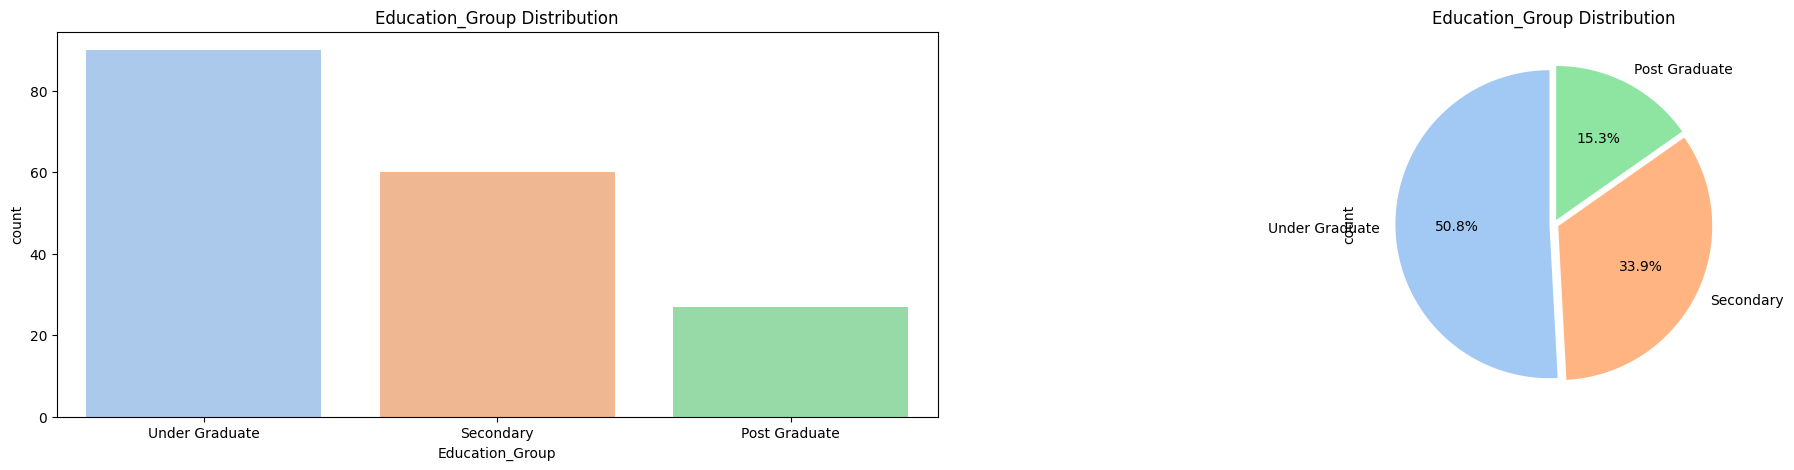

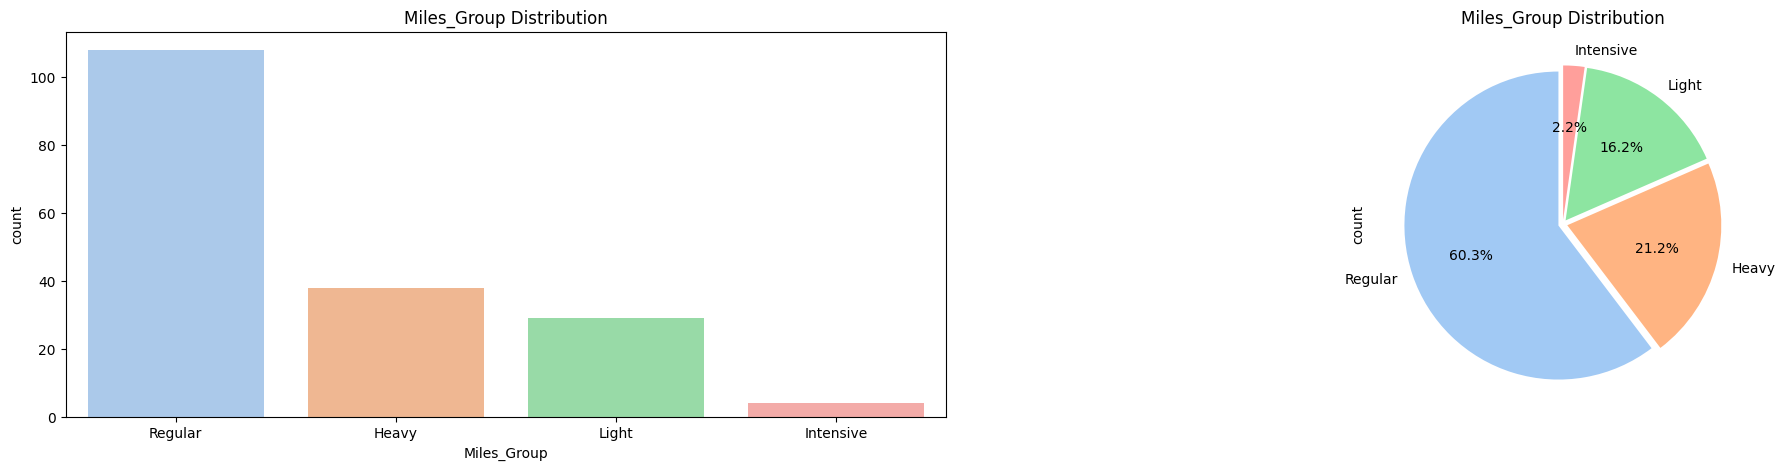

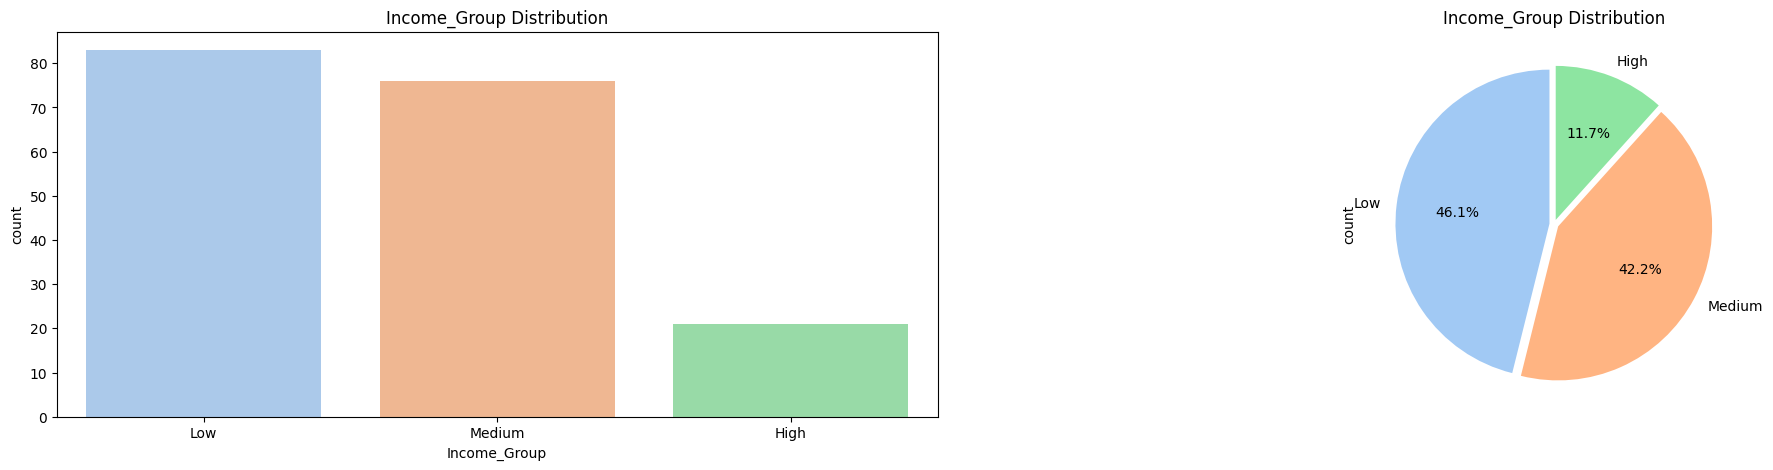

In [ ]:
# Distribution of Products in the dataset
for col in aerofit_df.select_dtypes(["object"]).columns:
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 2, 1)
    sorted_counts = aerofit_df[col].value_counts().sort_values(ascending=False)
    sns.countplot(x=aerofit_df[col], palette='pastel', order=sorted_counts.index)
    plt.title(col+' Distribution')
    plt.subplot(1, 2, 2)
    aerofit_df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.03]*aerofit_df[col].nunique(), colors=sns.color_palette('pastel'))
    plt.title(col+' Distribution')
    plt.show()

<span style="font-size: 14px;">
<strong>Product Insight</strong>
<ul>
    <li>Among the users, 44.4% prefer KP281 which is the entry-level treadmill</li>
    <li>33.3% of the users prefer KP481 which is the mid variant</li>
    <li>22.2% of the users prefer the top end model KP781</li>
</ul>
<br>
<br>
<strong>Gender Insight</strong>
<ul>
    <li>57% of the Tredmill was used by Male</li>
    <li>42.2% of the Female uses Tredmill</li>
</ul>
<br>
<br>
<strong>Marital Insight</strong>
<ul>
    <li>Among the users, 59.4% of the partnered users uses treadmill</li>
    <li>Remaining 40.6% of the Single category people are using treadmill</li>
</ul>
<br>
<br>
<strong>Usage Insight</strong>
<ul>
    <li>Most of the users uses a treadmill, 3 times a week which contributes around 38.3%</li>
    <li>Likewise, 28.9% of the users uses a treadmill for 4 times a week</li>
    <li>As a whole, more than 65% of the users uses a treadmill for 3-4 times a week</li>
</ul>
<br>
<br>
<strong>Fitness Insight</strong>
<ul>
    <li>Among the users, who rated 3 out 5 in Fitness uses the treadmill most which contributes around 53.9%</li>
    <li>Users who rated 5, 2 and 4 out of 5 are more or less equally using the treadmill</li>
    <li>Users who rated 1 is the least and they may need a special concern to use treadmills </li>
</ul>
<br>
<br>
<strong>Age Group Insight</strong>
<ul>
    <li>Most of the Adults around 50.3% of total crowd is using treadmill significantly</li>
    <li>Second highest was the Young Aged people which is around 29.6%</li>
    <li>Mid Aged and Old people were not using treadmill much whose contribution is around 15.6% and 4.5%</li>
</ul>
<br>
<br>
<strong>Education Group Insight</strong>
<ul>
    <li>Mostly, Undergraduate people are using the treadmills which contributes around 50.8%</li>
    <li>Second highest was the Secondary Educated people which is 33.9%</li>
    <li>The least category people was Post Graduates who contributes around 15.3%</li>
</ul>
<br>
<br>
<strong>Miles Insight</strong>
<ul>
    <li>Most of the users, around 60.3% are using the treadmill regularly </li>
    <li>21.2% of the users using it Heavily and 16.2% peoples uses Lightly</li>
    <li>Only 2.2% of the users, using the treadmill intensively</li>
</ul>
<br>
<br>
<strong>Income Group Insight</strong>
<ul>
    <li>Majority of the treadmills are using by Low Income Category people which was around 46.1%</li>
    <li>Second highest is by Medium Income Range people who contributes around 42.2%</li>
    <li>Only 11.7% of the usage is from High Income Range people </li>
</ul>
<br>
<br>
</span>

##### Numerical Columns

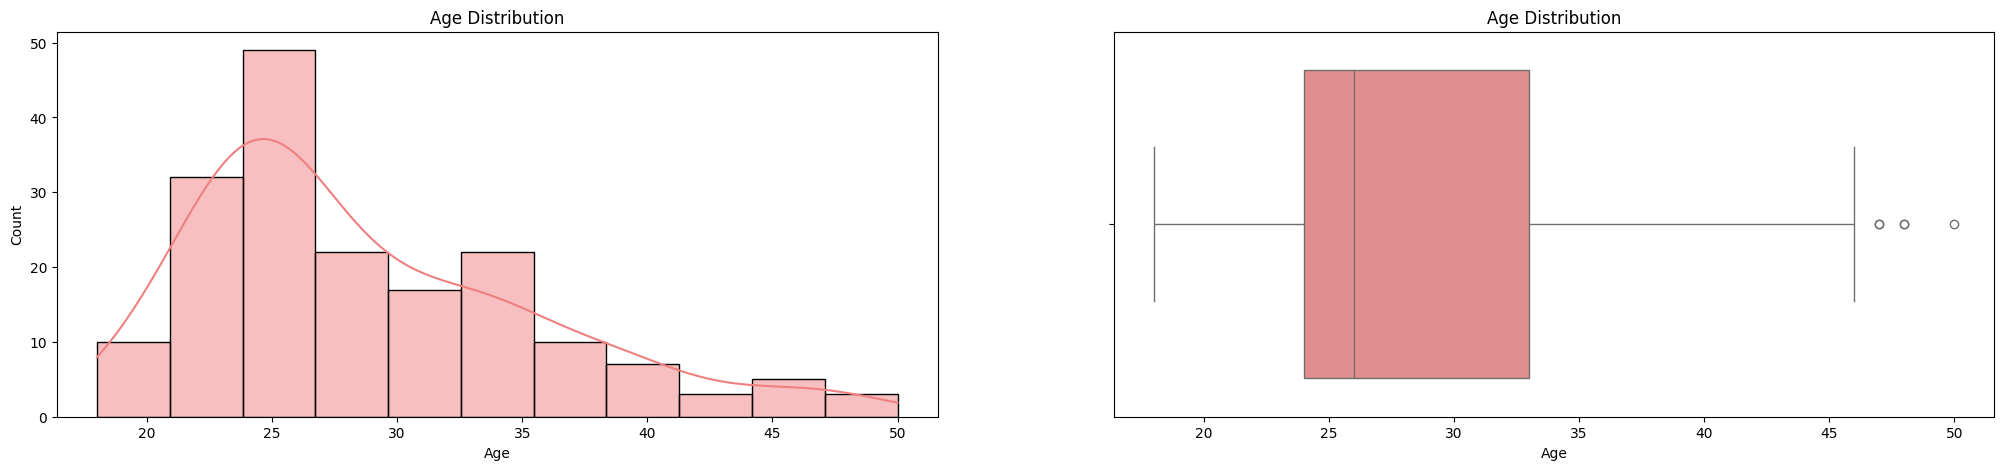

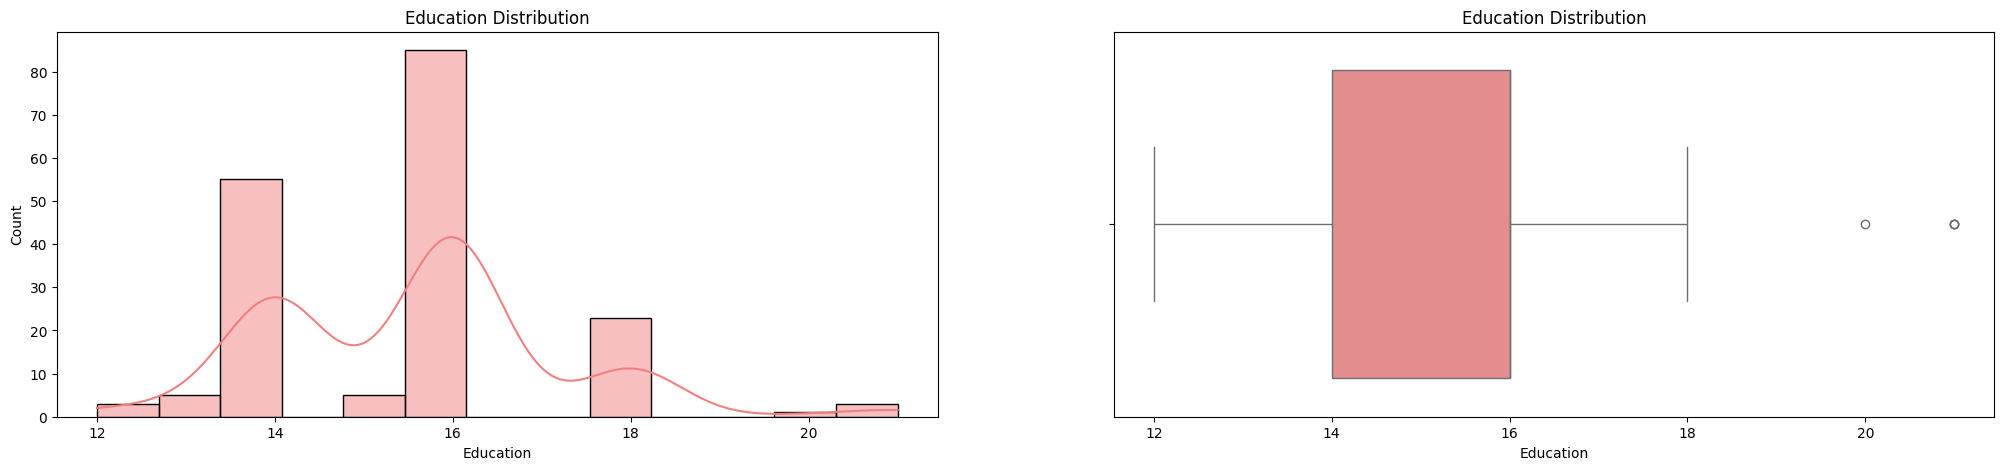

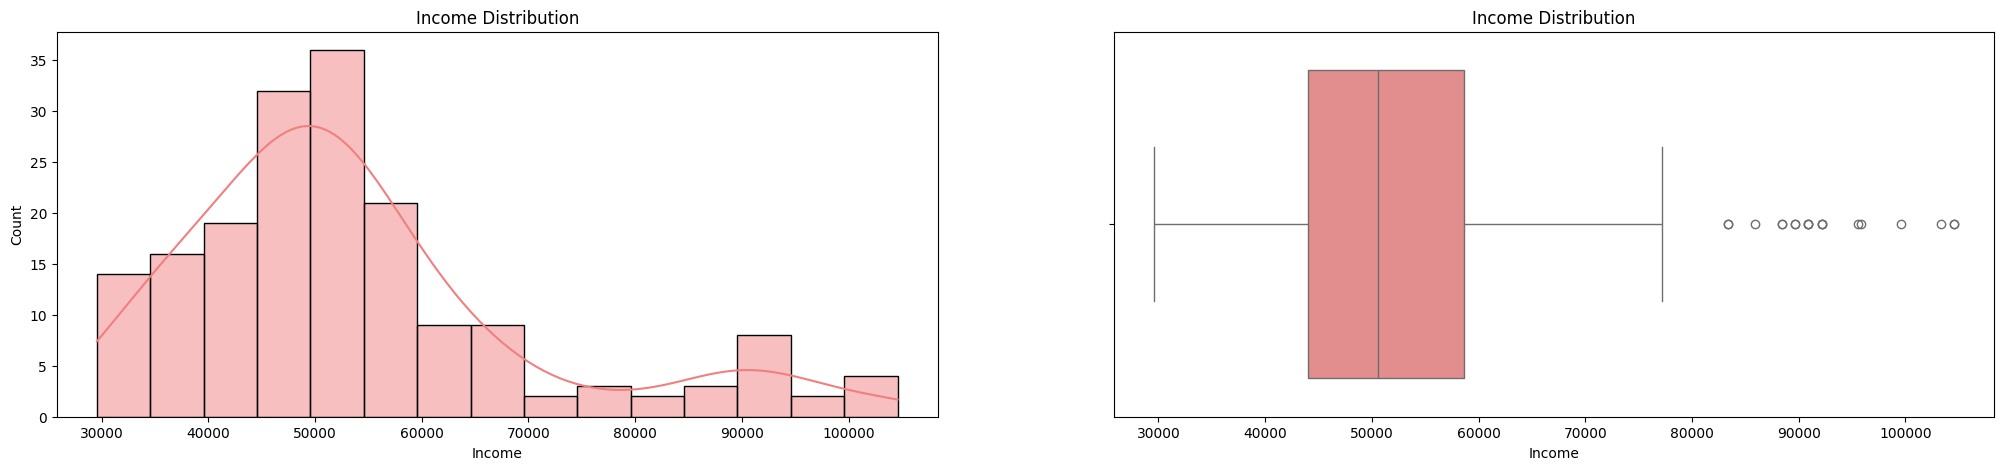

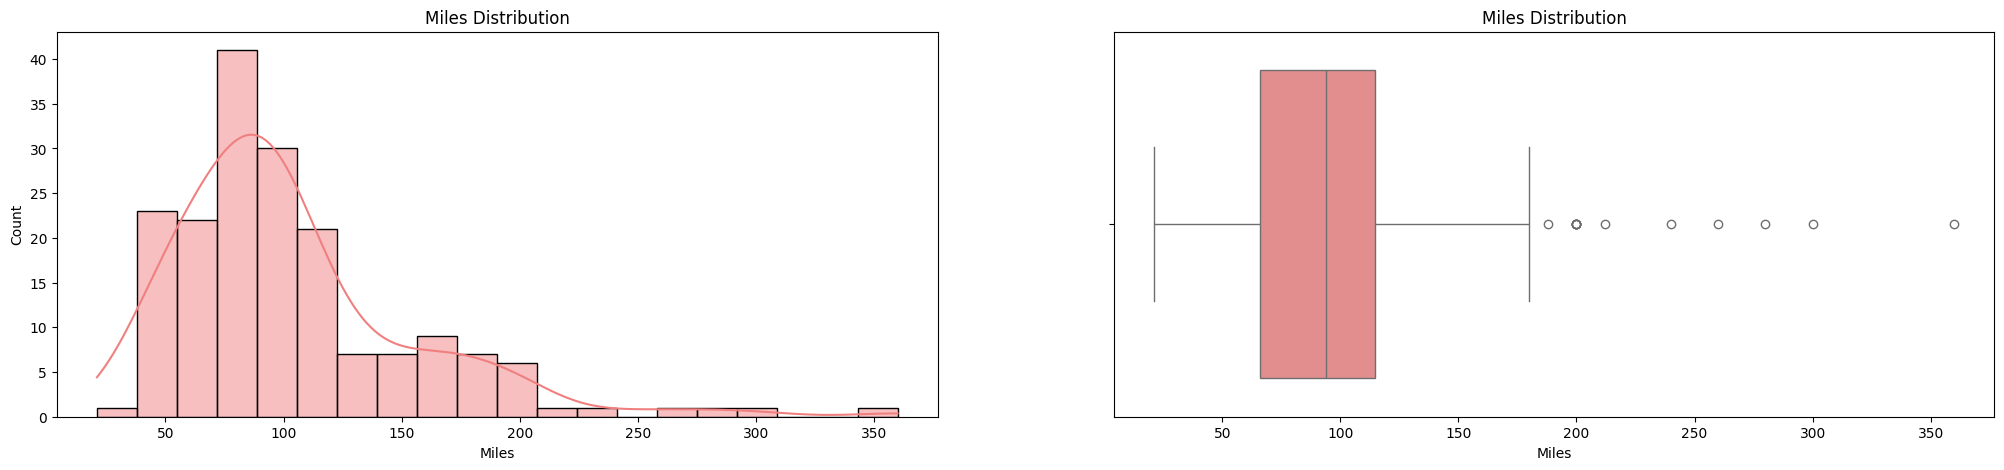

In [ ]:
# Distribution of Age, Education, Income and Miles
for col in aerofit_df.select_dtypes(["int64"]).columns:
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(aerofit_df[col], kde=True, color='lightcoral')
    plt.title(col+' Distribution')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=aerofit_df[col], color='lightcoral')
    plt.title(col+' Distribution')
    plt.show()

<span style="font-size: 14px;">
<strong> Inference: </strong> Same like the Categorical analysis and the previous outlier analysis, we got the graphs corresponds to Age, Education, Income, Miles
<ul>
    <li>18-25 years aged people, 16 years of educated people, 40k to 60k Income Range people and also the people who runs 90-110 miles regularly might buy the Aerofit treadmill because of having high probability.</li>
    <li>On the other hand, 40+ aged people, 20+ years educated people, 70k+ income range people and the people who runs 200+ miles per week might not buy the Aerofit treadmill because of having very low probability.</li>
</ul>
</span>

##### Bivariate Analysis

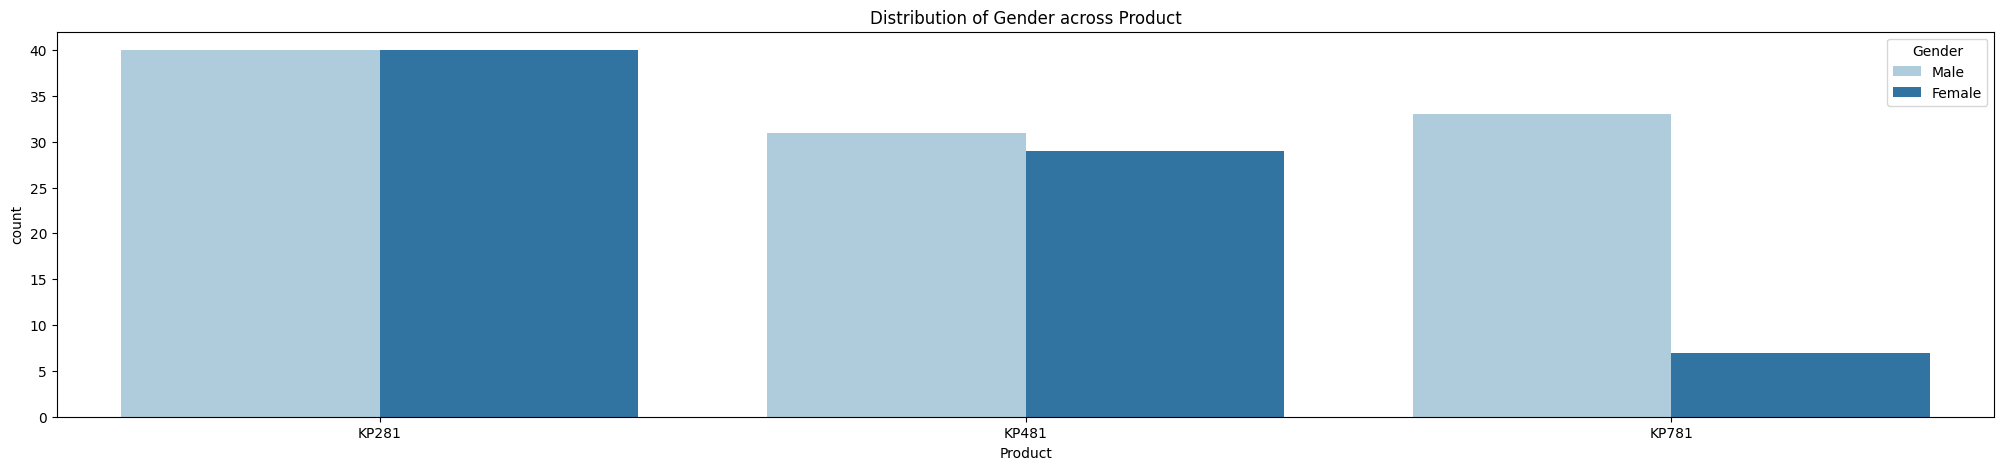

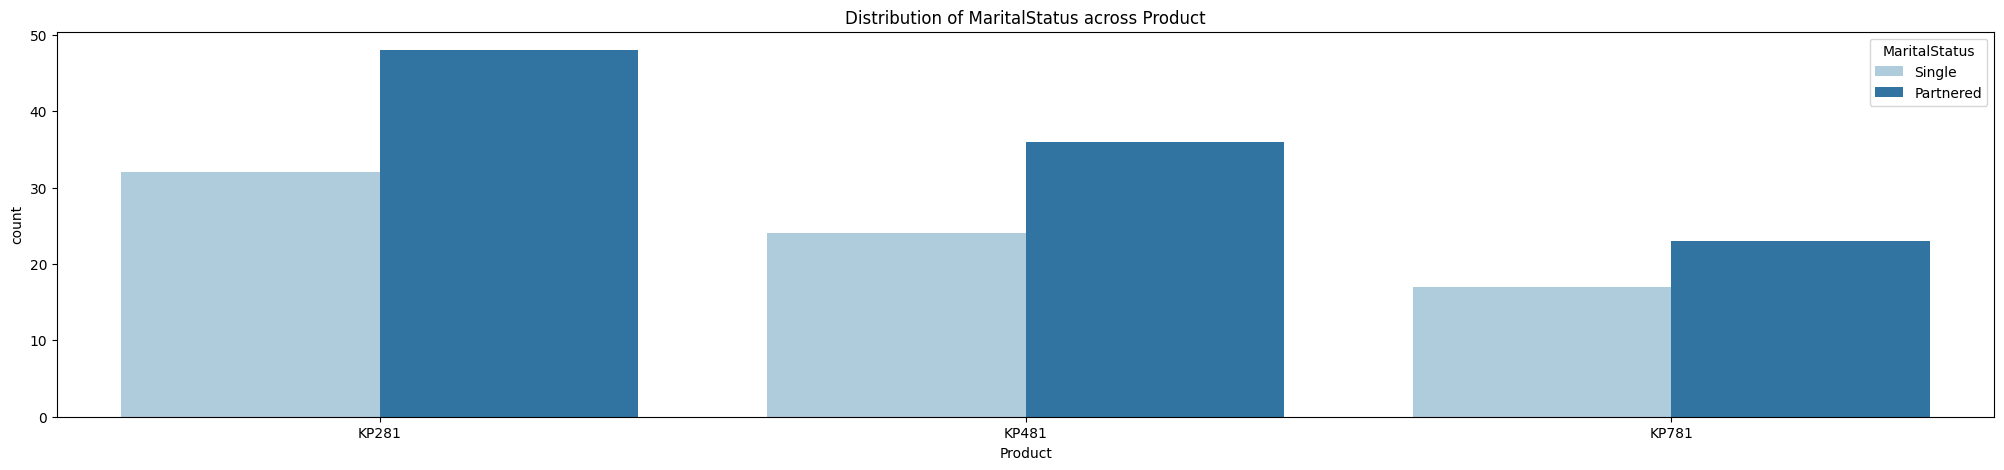

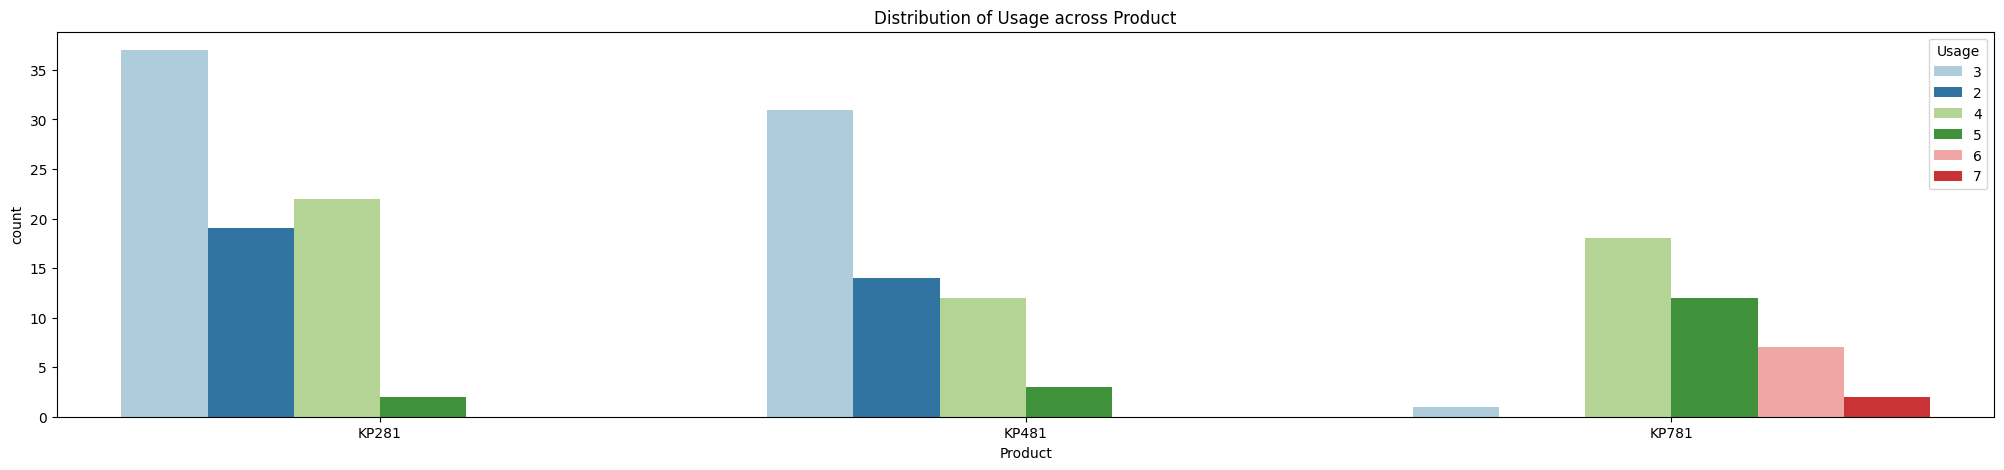

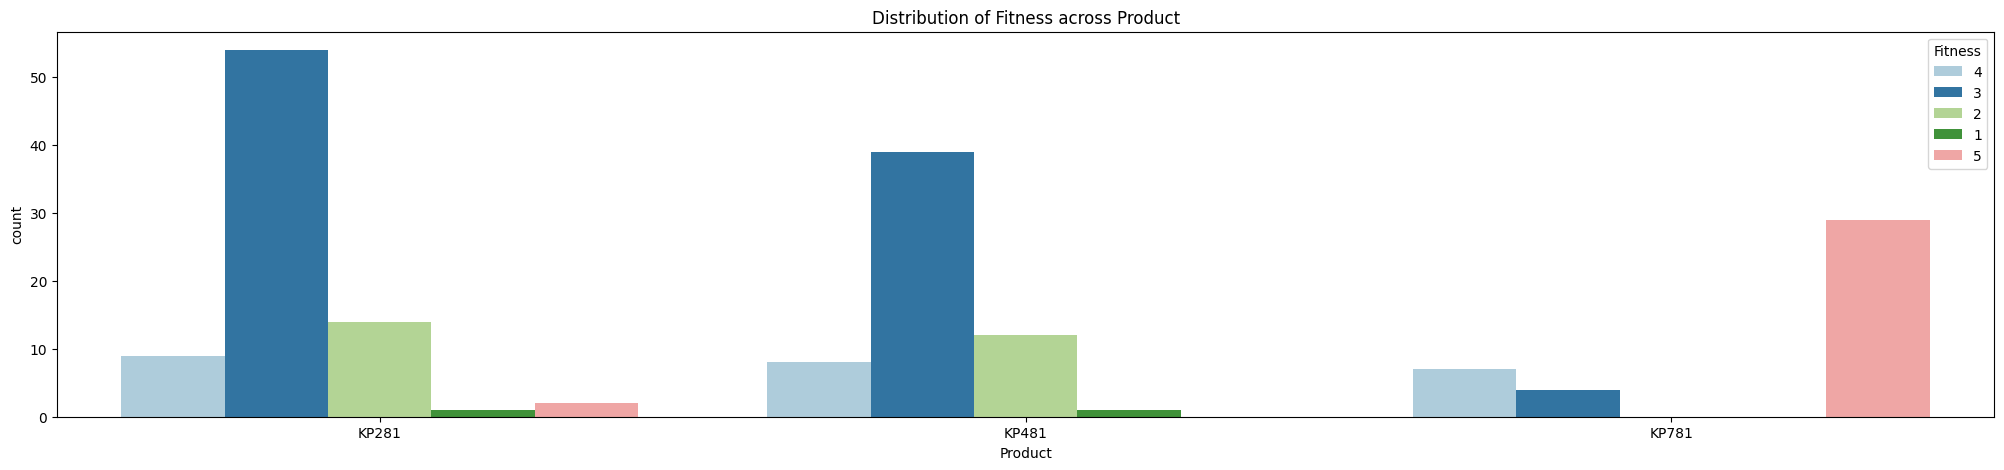

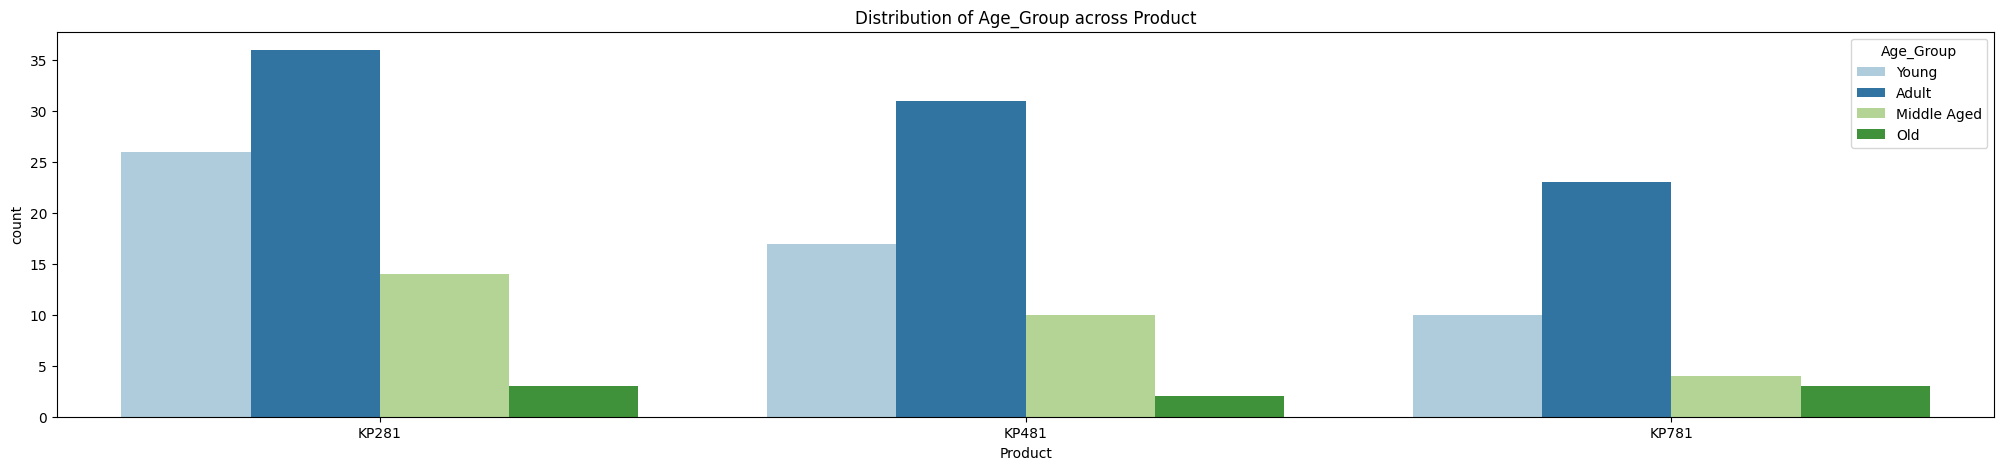

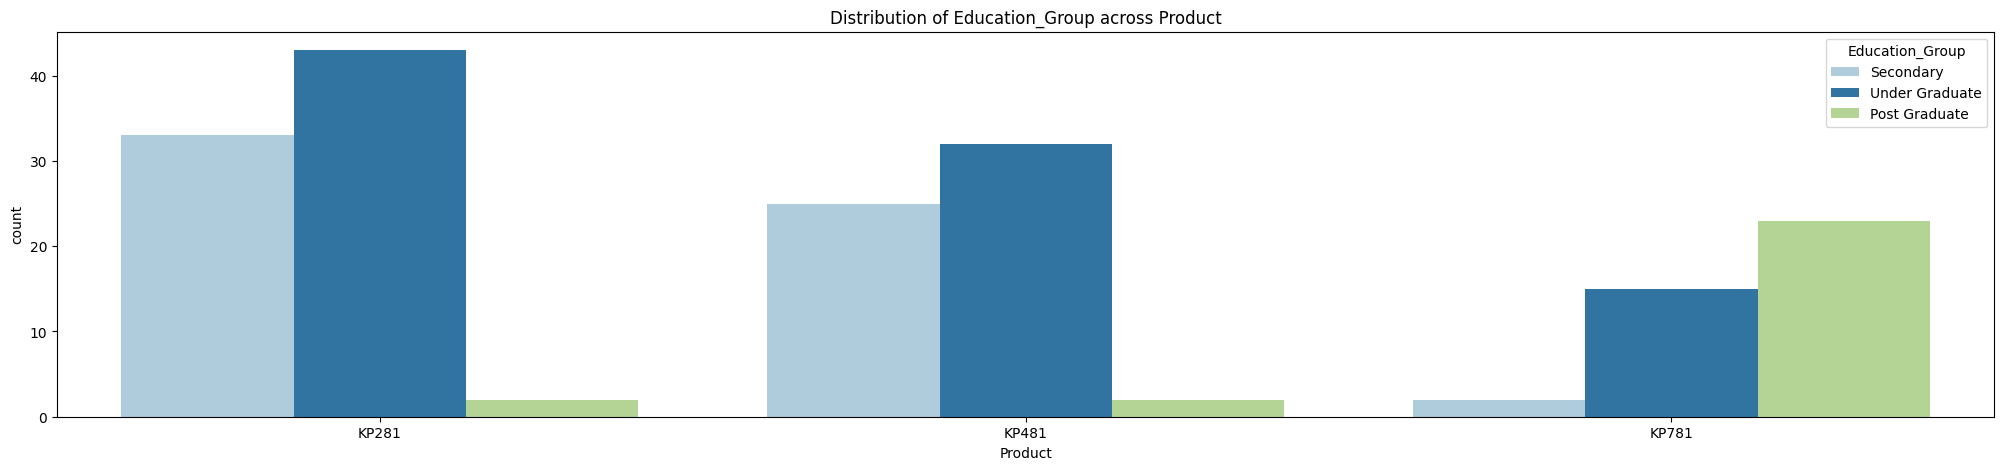

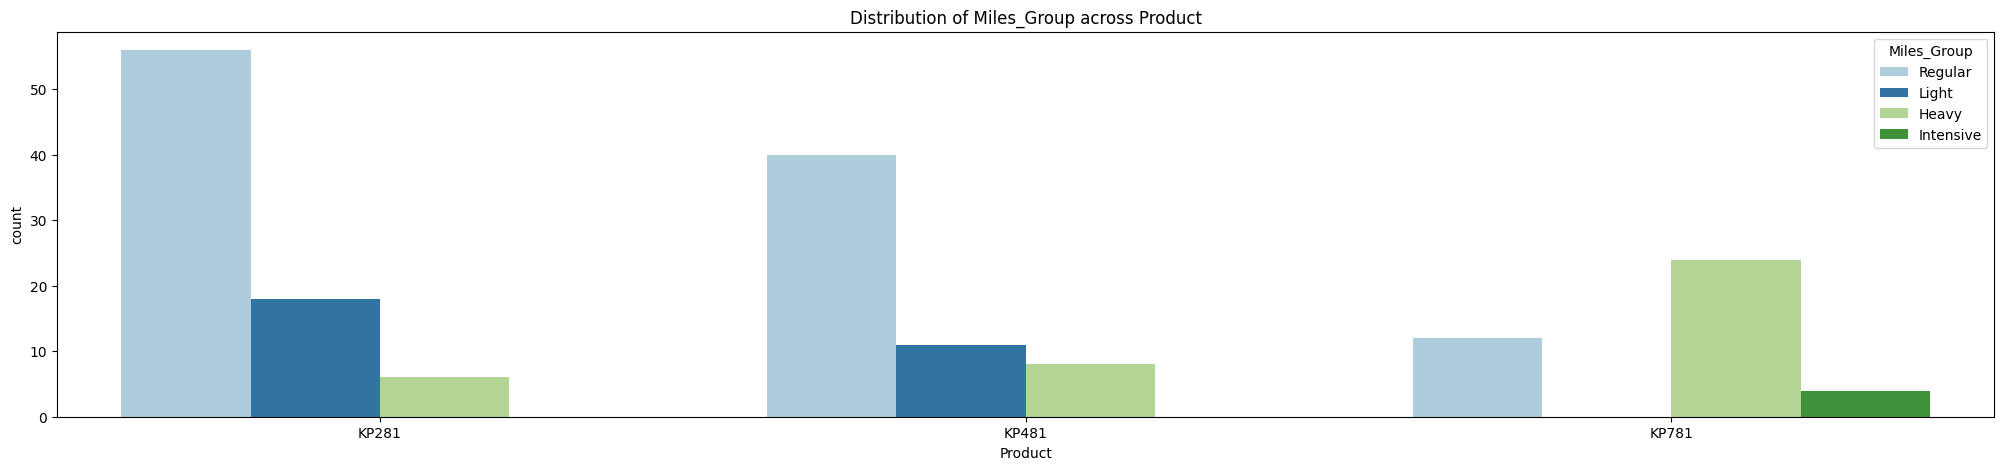

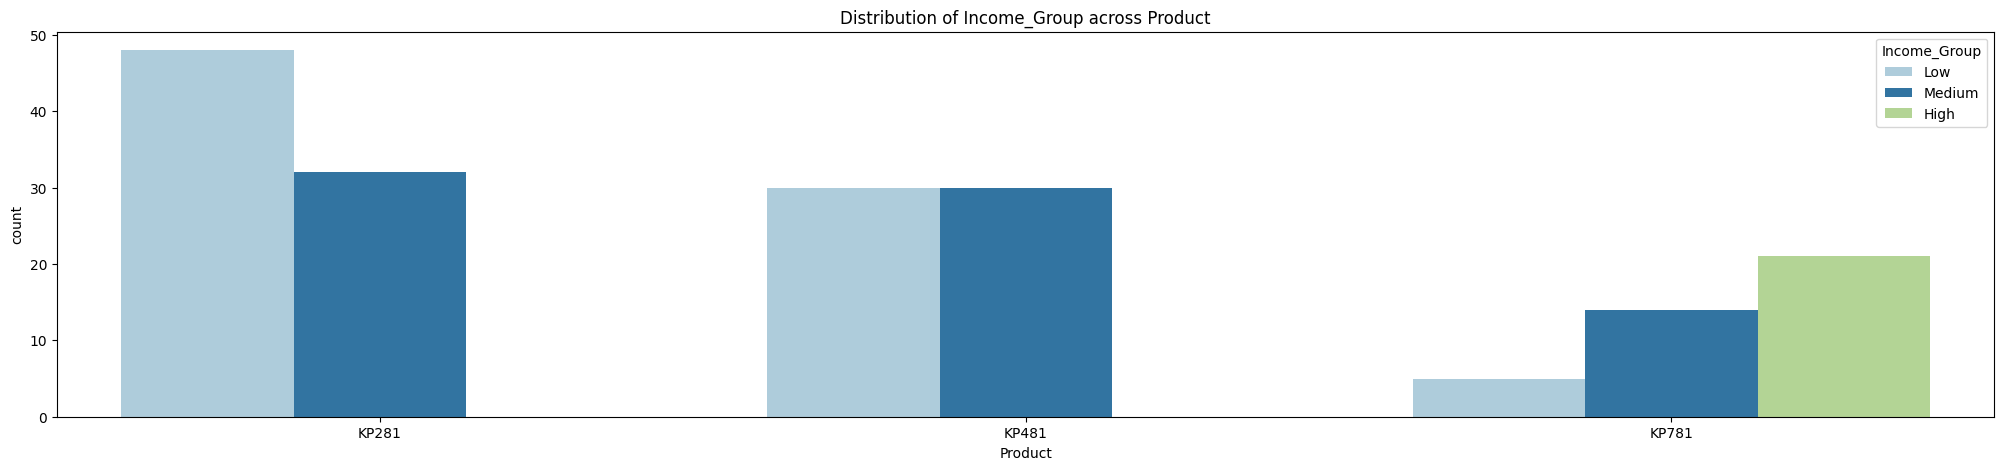

In [ ]:
def plot_distribution_across_product(df):
    for col in df.select_dtypes(["object"]).columns:
        if(col == 'Product'):
            continue
        plt.figure(figsize=(25, 5))
        sns.countplot(x=df['Product'], hue=df[col], palette='Paired')
        plt.title('Distribution of '+col+' across Product')
        plt.show()
plot_distribution_across_product(aerofit_df)


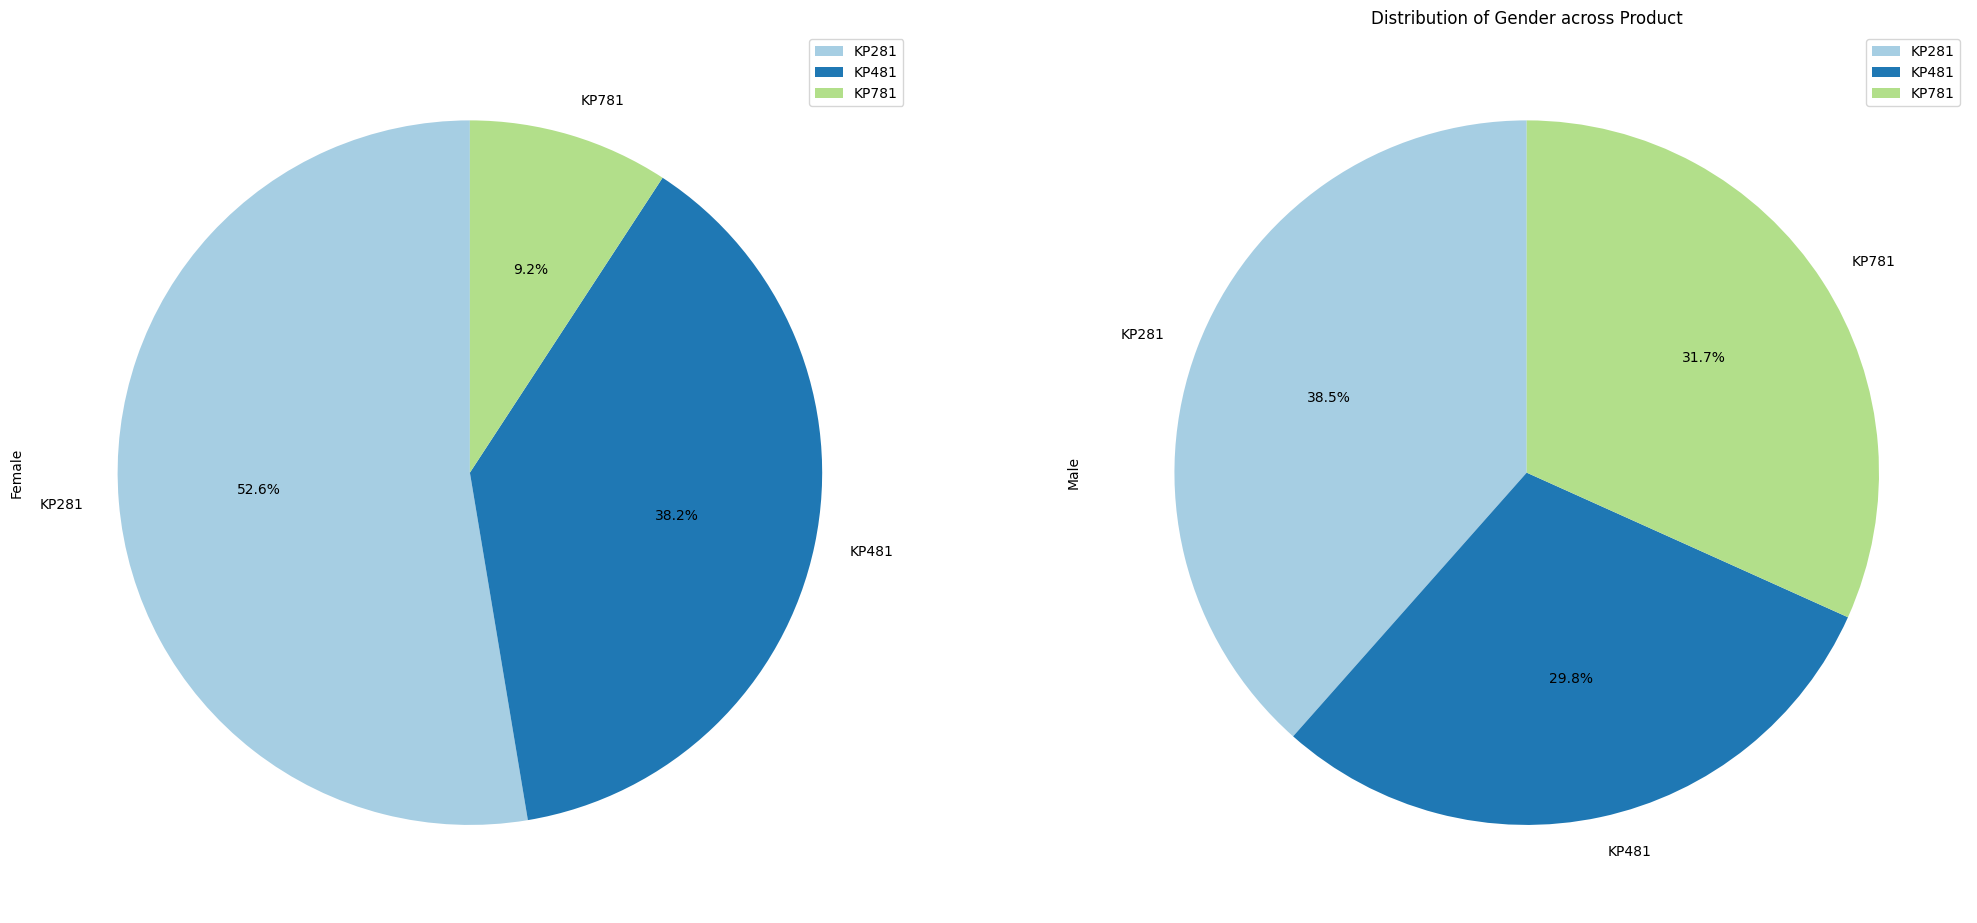

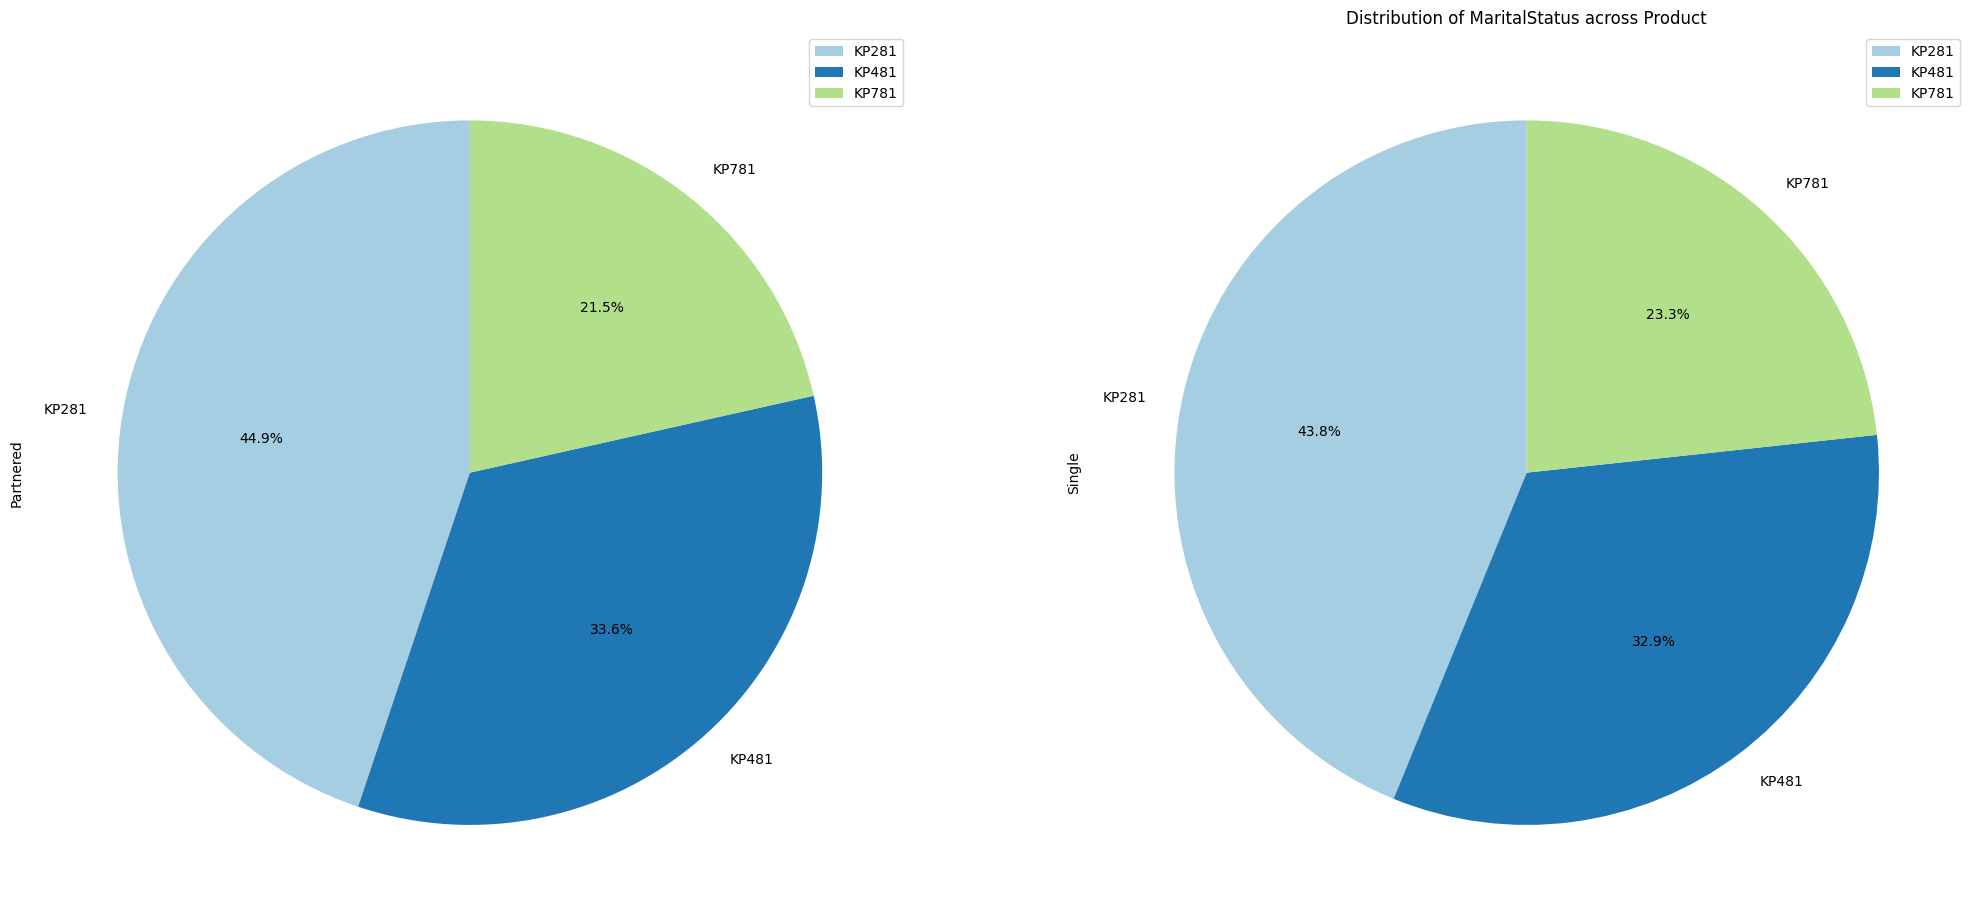

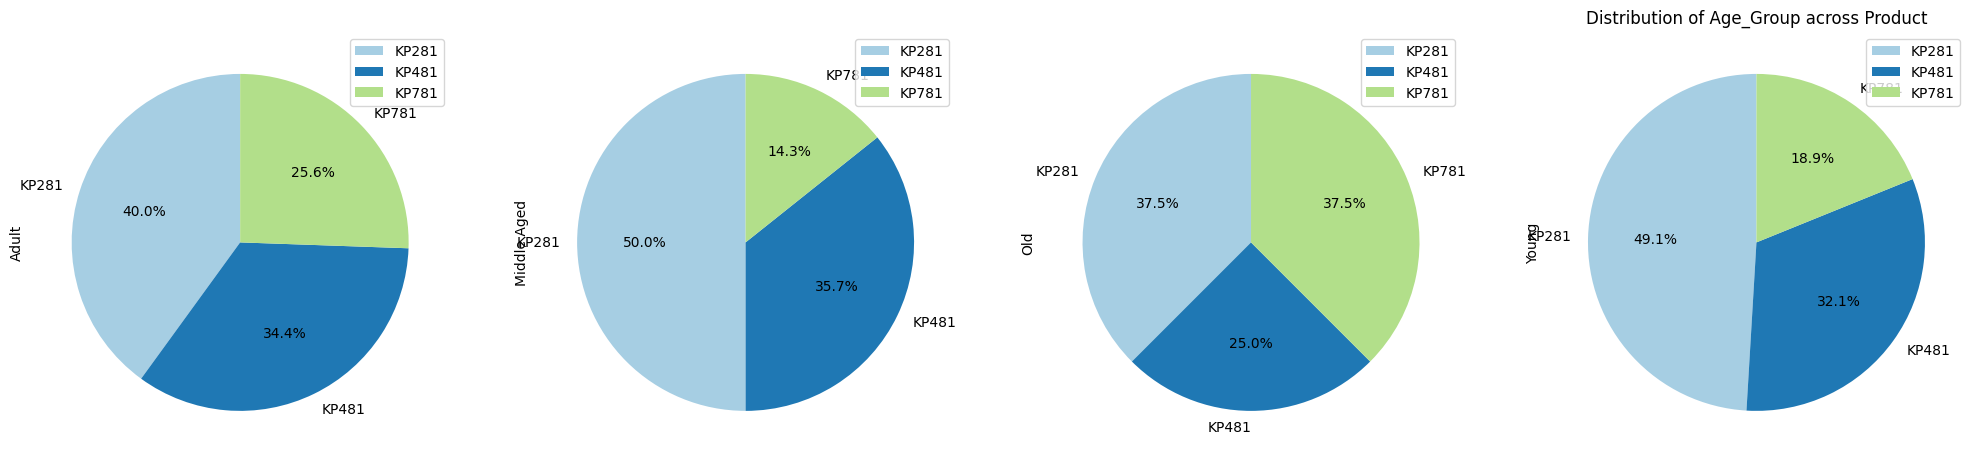

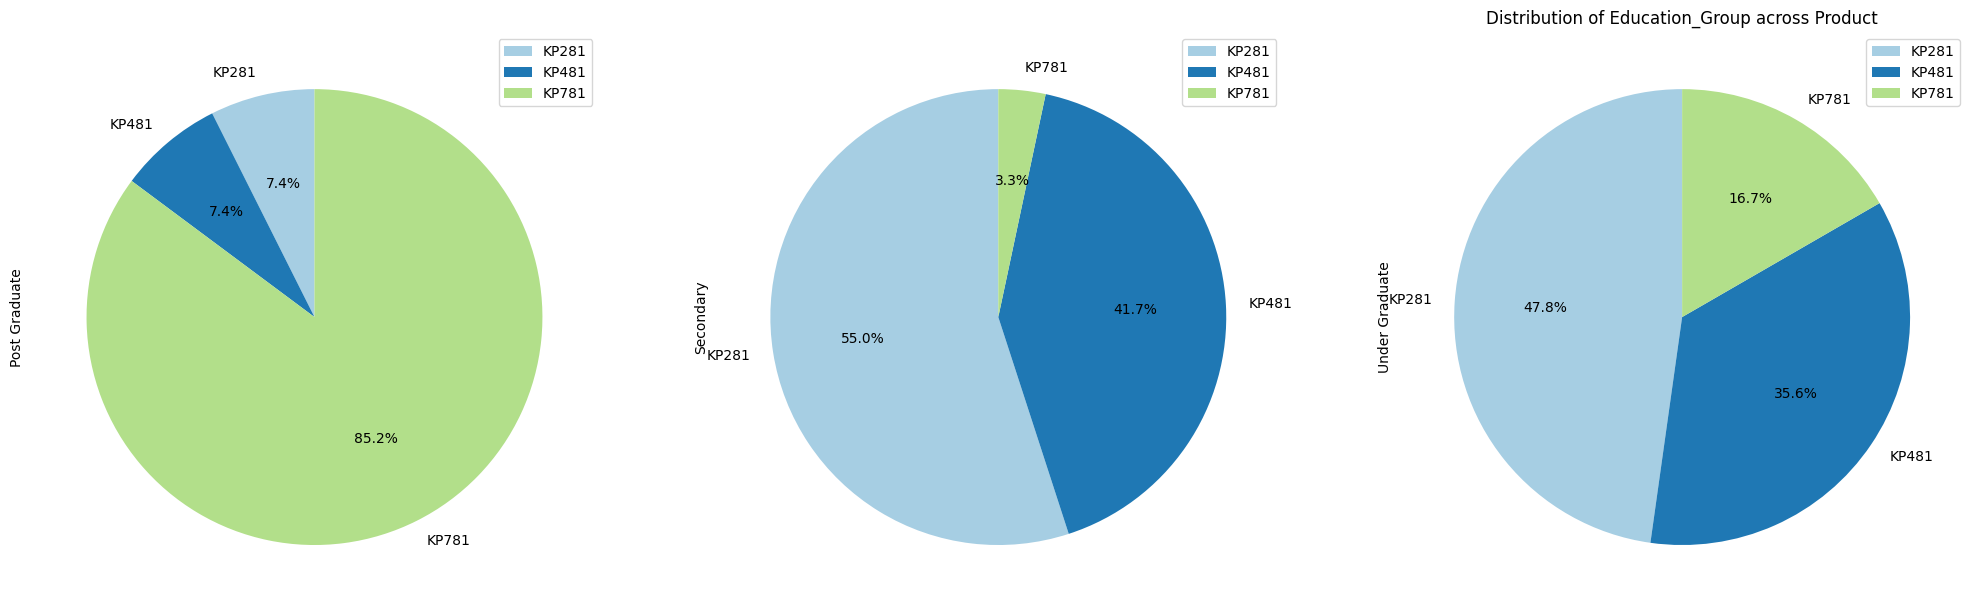

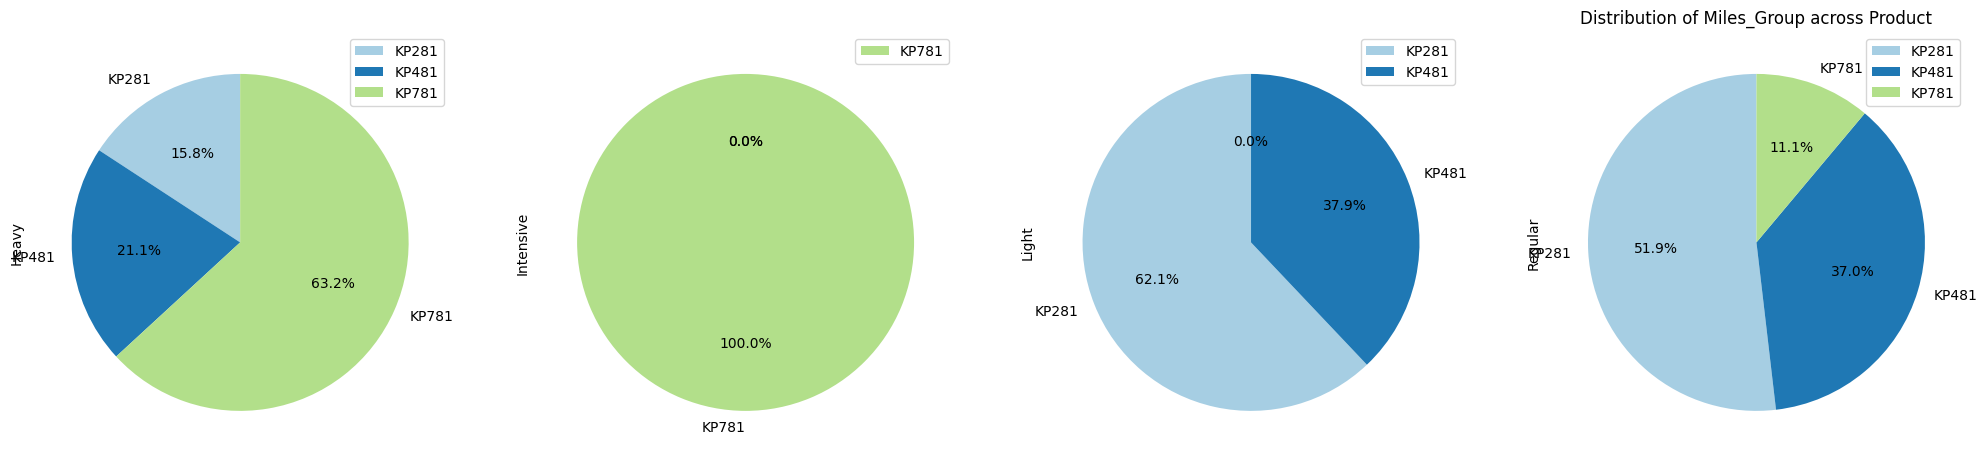

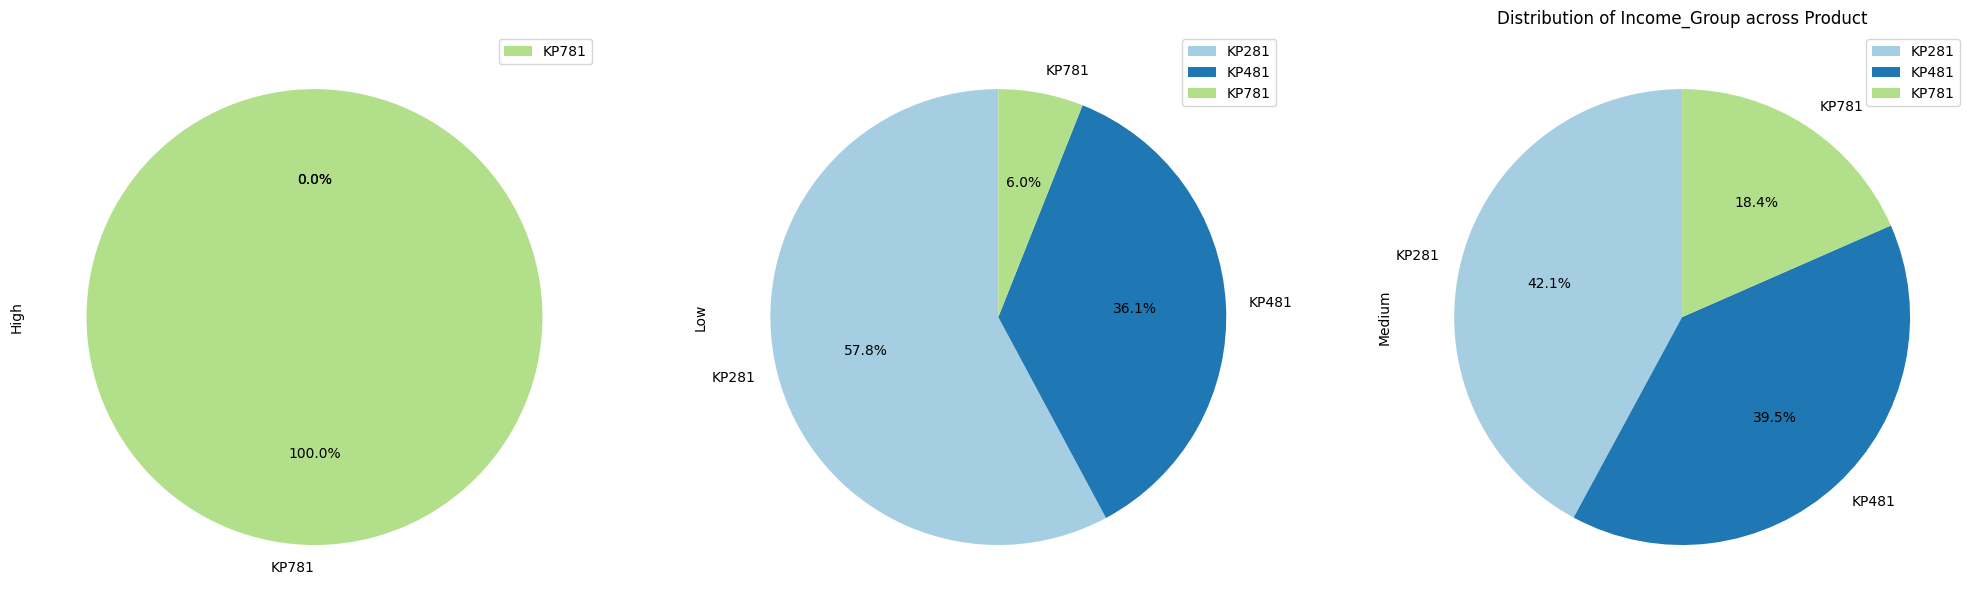

In [ ]:
def plot_distribution_across_product_pie(df):
    for col in df.select_dtypes(["object"]).columns:
        if(col == 'Product' or col == 'Usage' or col == 'Fitness' or col == 'Miles'):
            continue
        merged_df = df.groupby(['Product',col]).size().unstack()
        merged_df.plot(kind="pie", subplots=True, figsize=(25,15), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Paired'))
        plt.title('Distribution of '+col+' across Product')
        plt.show()

plot_distribution_across_product_pie(aerofit_df)

<span style="font-size: 14px;">
<strong> Gender Vs Categorical Insights: </strong>
<br>
<ul>
    <li>52.6% of Female and 38.5% of Male uses KP281 treadmill</li>
    <li>44.9% of the Partnered Users and 43.8% of Single users uses KP281</li>
    <li>40% of Adult, 50% Mid Aged people, 37.5% of Old, 49.1% of Young uses KP281</li>
    <li>Surprisingly, 85.2% of the Post Graduates are using KP781 which is a top end. But, 55% of Secondary and 47.8% of Under Graduates are using KP281</li>
    <li>Same like above, 63.2% of of Heavy usage people and 100% of Intensive usage people uses KP781. 62.1% of Light and 51.9% of Regular people are using KP281</li>
    <li>100% of the High Income people are using KP781 and 57.8% of Low and 42.1% of Medium Incom people using KP281</li>
    <li>Users who rated 3 out of 5 in fitness uses KP281 more than other category people</li>
    <li>Likewise, Users who uses treadmill for 3 times a week uses KP281 a lot</li>
</ul>
<br>
<br>
</span>

##### Correlations

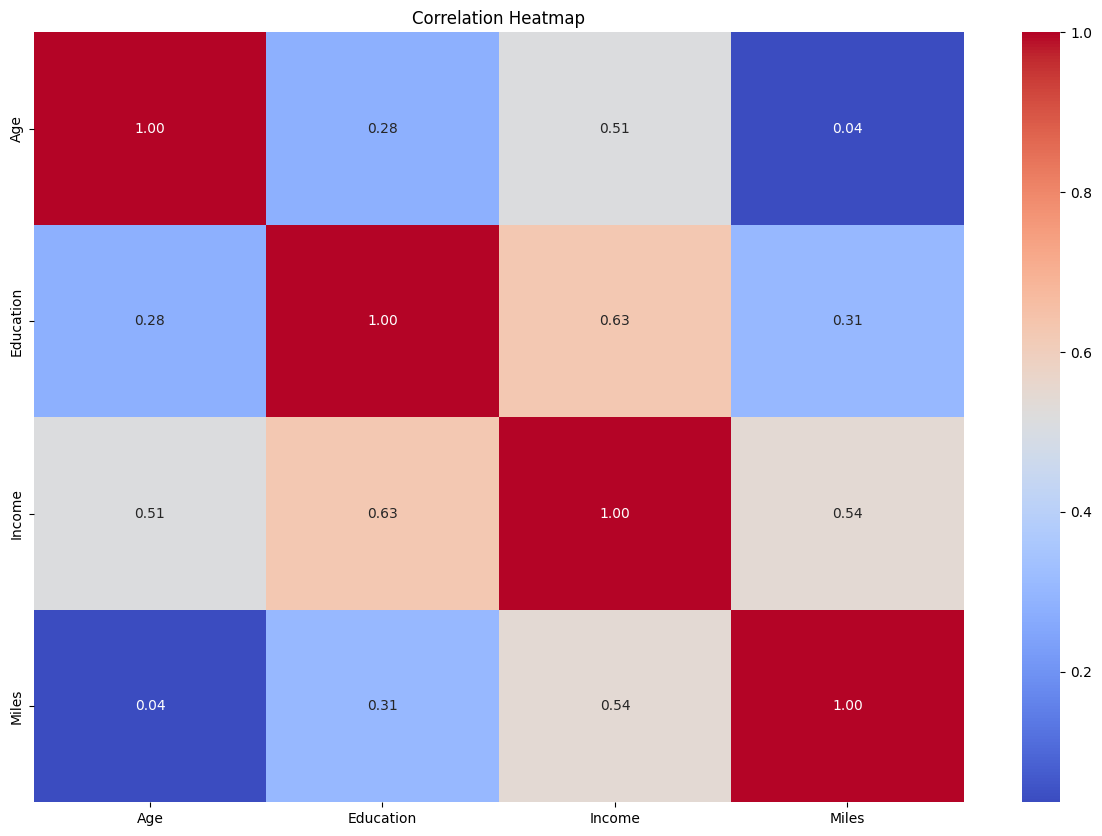

In [ ]:
# correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(aerofit_df.select_dtypes("int").corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<span style="font-size: 14px;">
<strong> Inference: </strong>
<ul>
    <li>Age-Income, Miles-Income, Education-Income are having high correlation which means it's directly proportional and whenever Income rises, Age, Miles and Education will increase towards the purchase</li>
    <li>Miles-Education is having a decent correlation and Age-Miles having the least correlations</li>
</ul>
</span>

#### Conditional and Marginal Probability

In [ ]:
# Marginal Distribution of the Categorical Columns
for col in aerofit_df.select_dtypes(["object"]).columns:
    print((aerofit_df[col].value_counts(normalize=True)*100).round(2).to_string())
    print("-"*20)

Product
KP281    44.44
KP481    33.33
KP781    22.22
--------------------
Gender
Male      57.78
Female    42.22
--------------------
MaritalStatus
Partnered    59.44
Single       40.56
--------------------
Usage
3    38.33
4    28.89
2    18.33
5     9.44
6     3.89
7     1.11
--------------------
Fitness
3    53.89
5    17.22
2    14.44
4    13.33
1     1.11
--------------------
Age_Group
Adult          50.28
Young          29.61
Middle Aged    15.64
Old             4.47
--------------------
Education_Group
Under Graduate    50.85
Secondary         33.90
Post Graduate     15.25
--------------------
Miles_Group
Regular      60.34
Heavy        21.23
Light        16.20
Intensive     2.23
--------------------
Income_Group
Low       46.11
Medium    42.22
High      11.67
--------------------


<span style="font-size: 14px;">
<strong> Inference: </strong>
<br>
Marginal Probability for the Categorical columns are calculated
<ul>
    <li><strong>Product: </strong> KP281 is the popular product which is having the probability of 44.4%</li>
    <li><strong>Gender: </strong> Male Category people are using the treadmill more than the Female category with the probality of 57.7%</li>
    <li><strong>Marital Status: </strong>Partnered People are using the treadmill more than the Singles and their contribution is around 59.4%</li>
    <li><strong>Usage: </strong>Most of the people uses the treadmill for 3 times a week with is aroud 38.3%</li>
    <li><strong>Fitness Scale: </strong>Most of the people who uses treadmill are on scale 3 out of 5 in fitness</li>
    <li><strong>Age Group: </strong>Adult Group People are using the treadmill a lot which contributes to 50% of total usage</li>
    <li><strong>Miles Group: </strong>Nearly 60% people uses the treadmill regularly</li>
    <li><strong>Income Group: </strong>Majority of the treadmill users falls under the low income categeory</li>
</ul>
</span>

##### Marginal Probability

In [ ]:
#Conditional Distribution of the Categorical Columns
for col in aerofit_df.select_dtypes(["object"]).columns:
    if(col == 'Product'):
        continue
    print(pd.crosstab(index=aerofit_df['Product'], columns=aerofit_df[col], normalize='index').round(2)*100)
    print("-"*50)

Gender   Female  Male
Product              
KP281      50.0  50.0
KP481      48.0  52.0
KP781      18.0  82.0
--------------------------------------------------
MaritalStatus  Partnered  Single
Product                         
KP281               60.0    40.0
KP481               60.0    40.0
KP781               57.0    42.0
--------------------------------------------------
Usage       2     3     4     5     6    7
Product                                   
KP281    24.0  46.0  28.0   2.0   0.0  0.0
KP481    23.0  52.0  20.0   5.0   0.0  0.0
KP781     0.0   2.0  45.0  30.0  18.0  5.0
--------------------------------------------------
Fitness    1     2     3     4     5
Product                             
KP281    1.0  18.0  68.0  11.0   2.0
KP481    2.0  20.0  65.0  13.0   0.0
KP781    0.0   0.0  10.0  18.0  72.0
--------------------------------------------------
Age_Group  Adult  Middle Aged  Old  Young
Product                                  
KP281       46.0         18.0  4.0   

<span style="font-size: 14px;">
<strong> Inference: </strong>
<br>
Conditional Probability for the Categorical columns are calculated
<br>
<strong>KP281:</strong>
<ul>
    <li>P(Female|KP281) = 0.50</li>
    <li>P(Male|KP281) = 0.50</li>
    <li>P(Partnered|KP281) = 0.60</li>
    <li>P(Single|KP281) = 0.40</li>
    <li>P(2_Usage|KP281) = 0.24</li>
    <li>P(3_Usage_|KP281) = 0.46</li>
    <li>P(4_Usage_|KP281) = 0.28</li>
    <li>P(5_Usage_|KP281) = 0.02</li>
    <li>P(6_Usage_|KP281) = 0.00</li>
    <li>P(7_Usage_|KP281) = 0.00</li>
    <li>P(1_Fitness|KP281) = 0.01</li>
    <li>P(2_Fitness|KP281) = 0.18</li>
    <li>P(3_Fitness|KP281) = 0.68</li>
    <li>P(4_Fitness|KP281) = 0.11</li>
    <li>P(5_Fitness|KP281) = 0.02</li>
    <li>P(Adult|KP281) = 0.46</li>
    <li>P(Middle_Aged|KP281) = 0.18</li>
    <li>P(Old|KP281) = 0.04</li>
    <li>P(Young|KP281) = 0.33</li>
    <li>P(PG|KP281) = 0.03</li>
    <li>P(Secondary|KP281) = 0.42</li>
    <li>P(UG|KP281) = 0.55</li>
    <li>P(Heavy|KP281) = 0.08</li>
    <li>P(Intensive|KP281) = 0.0</li>
    <li>P(Light|KP281) = 0.22</li>
    <li>P(Regular|KP281) = 0.70</li>
    <li>P(High_Income|KP281) = 0.0</li>
    <li>P(Low_Income|KP281) = 0.60</li>
    <li>P(Medium_Income|KP281) = 0.40</li>
</ul>
<br>
<strong>KP481:</strong>
<ul>
    <li>P(Female|KP481) = 0.48</li>
    <li>P(Male|KP481) = 0.52</li>
    <li>P(Partnered|KP481) = 0.60</li>
    <li>P(Single|KP481) = 0.40</li>
    <li>P(2_Usage|KP481) = 0.23</li>
    <li>P(3_Usage_|KP481) = 0.52</li>
    <li>P(4_Usage_|KP481) = 0.20</li>
    <li>P(5_Usage_|KP481) = 0.05</li>
    <li>P(6_Usage_|KP481) = 0.00</li>
    <li>P(7_Usage_|KP481) = 0.00</li>
    <li>P(1_Fitness|KP481) = 0.02</li>
    <li>P(2_Fitness|KP481) = 0.20</li>
    <li>P(3_Fitness|KP481) = 0.65</li>
    <li>P(4_Fitness|KP481) = 0.13</li>
    <li>P(5_Fitness|KP481) = 0.00</li>
    <li>P(Adult|KP481) = 0.52</li>
    <li>P(Middle_Aged|KP481) = 0.17</li>
    <li>P(Old|KP481) = 0.03</li>
    <li>P(Young|KP481) = 0.28</li>
    <li>P(PG|KP481) = 0.03</li>
    <li>P(Secondary|KP481) = 0.42</li>
    <li>P(UG|KP481) = 0.54</li>
    <li>P(Heavy|KP481) = 0.14</li>
    <li>P(Intensive|KP481) = 0.0</li>
    <li>P(Light|KP481) = 0.19</li>
    <li>P(Regular|KP481) = 0.68</li>
    <li>P(High_Income|KP481) = 0.0</li>
    <li>P(Low_Income|KP481) = 0.50</li>
    <li>P(Medium_Income|KP481) = 0.50</li>
</ul>
<br>
<strong>KP781:</strong>
<ul>
    <li>P(Female|KP781) = 0.18</li>
    <li>P(Male|KP781) = 0.82</li>
    <li>P(Partnered|KP781) = 0.57</li>
    <li>P(Single|KP781) = 0.42</li>
    <li>P(2_Usage|KP781) = 0.00</li>
    <li>P(3_Usage_|KP781) = 0.02</li>
    <li>P(4_Usage_|KP781) = 0.45</li>
    <li>P(5_Usage_|KP781) = 0.30</li>
    <li>P(6_Usage_|KP781) = 0.18</li>
    <li>P(7_Usage_|KP781) = 0.05</li>
    <li>P(1_Fitness|KP781) = 0.00</li>
    <li>P(2_Fitness|KP781) = 0.00</li>
    <li>P(3_Fitness|KP781) = 0.10</li>
    <li>P(4_Fitness|KP781) = 0.18</li>
    <li>P(5_Fitness|KP781) = 0.72</li>
    <li>P(Adult|KP781) = 0.57</li>
    <li>P(Middle_Aged|KP781) = 0.10</li>
    <li>P(Old|KP781) = 0.08</li>
    <li>P(Young|KP781) = 0.25</li>
    <li>P(PG|KP781) = 0.57</li>
    <li>P(Secondary|KP781) = 0.05</li>
    <li>P(UG|KP781) = 0.38</li>
    <li>P(Heavy|KP781) = 0.60</li>
    <li>P(Intensive|KP781) = 0.1</li>
    <li>P(Light|KP781) = 0.0</li>
    <li>P(Regular|KP781) = 0.30</li>
    <li>P(High_Income|KP781) = 0.52</li>
    <li>P(Low_Income|KP781) = 0.12</li>
    <li>P(Medium_Income|KP781) = 0.35</li>
</ul>
</span>

In [ ]:
end_time = datetime.datetime.now()
total_time = end_time - start_time
minutes, seconds = divmod(total_time.total_seconds(), 60)
print(f"Total execution time: {int(minutes)} minutes and {int(seconds)} seconds")

Total execution time: 0 minutes and 16 seconds


#### Business Insights  

<span style="font-size:14px">
<ul>
  <li>Among the users, 44.44% prefer using KP281 treadmill, while 33.33% opt for the KP481 treadmill and only 22.22% of users favor the KP781 treadmill</li>
  <li>KP281 is the most prefered choice for most of the users. This can also be because of the pricing competive for Entry level.</li>
  <li>Probability of Male cutomers buying KP481 is 17%</li>
  <li>Probability of Female Customer buying KP481 is 16%</li>
  <li>There are 10% of outliers in income category and mostly they bought KP781</li>
  <li>KP781 treadmill, being more advanced and costlier than the other two options, is chosen by only 22.2% of customers.</li>
</ul>
</span>

#### Recommendations   

<span style="font-size:14px">
<ul>
  <li>Currently, Most of the people are using the KP281. Only the High Income Category people uses the KP781 a lot. Hence, if we market the KP481 with some offers, we can move the crowd from KP281 to KP381.</li>
  <li>Female Group people are not buying KP781. Need to analyse and make some strategy to cover that area</li>
  <li>People who are using treadmill for 6 or 7 times a week are completely using K781 which is good. But, people who're using 2 or 3 times are not using KP781. Hence, some strategy is required there. </li>
  <li>People who rated themself as 1 or 2 out of 5 Fitness were not using the treadmill at all. We need to think of some way to attrack them via offers and great deals.</li>
  <li>Old people also not using treadmills which is a bit concern and need to get the customer feedbacks on how hard it's for them to use. If some improvements required on design, we can afford that to increase the sales on old people category.</li>
  <li>most of the PG people are not using KP281 and KP481. Need to closely monitor these sales.</li>
  <li>People who are intensively using are not more and again the survey is required to get the user's feedback.</li>
  <li>Medium Income Range people are using the KP481 the most. But, need to give some deals and offers to shift them to KP781 and similarly, need to watch closely the low income people's purchase and need to provide offers to move them from KP281 to KP481</li>
</ul>
</span>